# 1.Define the problem and perform Exploratory Data Analysis
- Read the data as an appropriate time series data - Plot the data - Perform EDA - Perform Decomposition


In [2498]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#from pandas import datetime
from datetime import datetime

#statistics
from statsmodels.distributions.empirical_distribution import ECDF

#time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import warnings
warnings.filterwarnings('ignore')

In [2499]:
#import data
df = pd.read_csv("C:/Users/user/Desktop/PGDSBA/TSF/Project/Rose.csv")

In [2500]:
df.head()

YearMonth   Rose
0   1980-01  112.0
1   1980-02  118.0
2   1980-03  129.0
3   1980-04   99.0
4   1980-05  116.0

In [2501]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   YearMonth  187 non-null    object 
 1   Rose       185 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.1+ KB


In [2502]:
df.tail()

YearMonth  Rose
182   1995-03  45.0
183   1995-04  52.0
184   1995-05  28.0
185   1995-06  40.0
186   1995-07  62.0

In [2503]:
#check if date is defined as index
df.index

RangeIndex(start=0, stop=187, step=1)

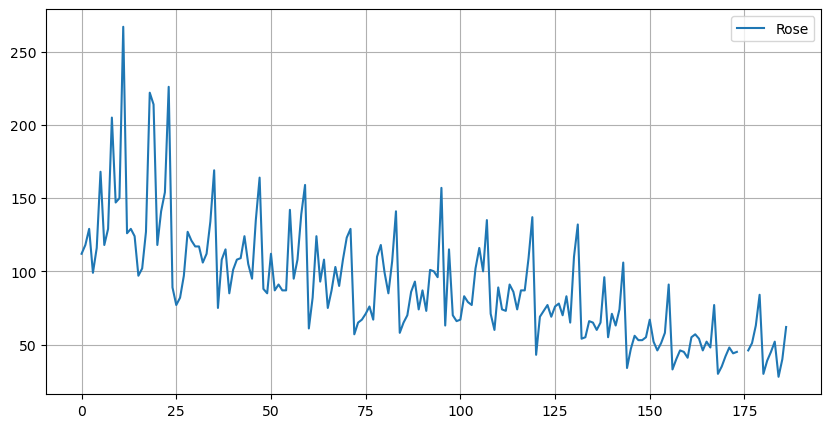

In [2504]:
df.plot();
plt.grid()

#X axis is not time so we will timestamp it

In [2505]:
date =pd.date_range(start= '1/1/1980', end = '8/1/1995', freq = 'M')

In [2506]:
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [2507]:
df['Timestamp'] = pd.DataFrame(date, columns=['YearMonth'])
df.head()

YearMonth   Rose  Timestamp
0   1980-01  112.0 1980-01-31
1   1980-02  118.0 1980-02-29
2   1980-03  129.0 1980-03-31
3   1980-04   99.0 1980-04-30
4   1980-05  116.0 1980-05-31

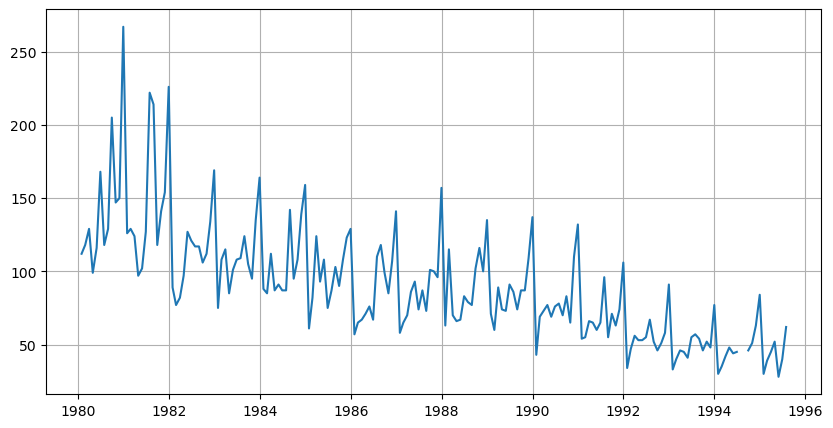

In [2508]:
plt.plot(df['Timestamp'],df['Rose']);
plt.grid()

In [2509]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [2510]:
df1 = df.set_index('Timestamp')
df1.drop(['YearMonth'], axis=1, inplace=True)
df1.head()

Rose
Timestamp        
1980-01-31  112.0
1980-02-29  118.0
1980-03-31  129.0
1980-04-30   99.0
1980-05-31  116.0

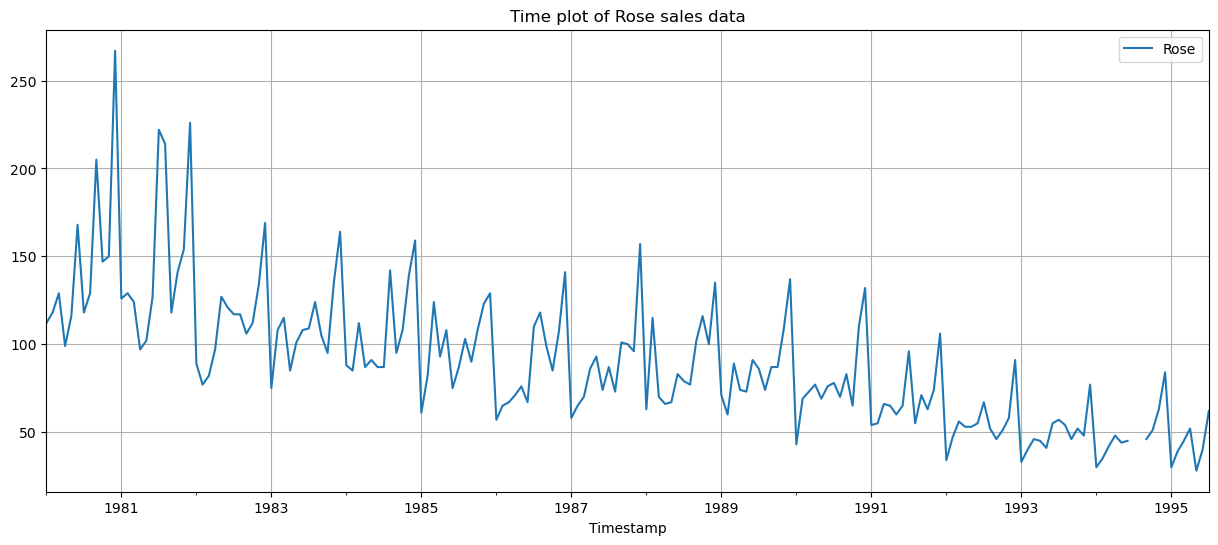

In [2511]:
#plot the times seris plot 

# The following code is to set the subsequent figure sizes

from pylab import rcParams
rcParams['figure.figsize'] = 10,5

df1.plot(figsize=(15,6))
plt.title('Time plot of Rose sales data')
plt.grid();

In [2512]:
#check nulll values which we will treate later
df1.isnull().sum()

Rose    2
dtype: int64

In [2513]:
#using loc function to fund null values
null_rows = df1.loc[df1['Rose'].isnull() ]
null_rows

Rose
Timestamp       
1994-07-31   NaN
1994-08-31   NaN

In [2514]:
#Other way to check Null Values
Null=pd.isnull(df1['Rose'])
df1[Null]

Rose
Timestamp       
1994-07-31   NaN
1994-08-31   NaN

# 2. Data Pre-processing
- Missing value treatment - Visualize the processed data - Train-test split


## Imputing the Missing Values
Here is the explanation of the techniques mentioned for handling missing values in time series data:

Mean Imputation: Replaces missing values with the average of the entire column. Simple and fast, but may not capture trends or local variations.

Median Imputation: Replaces missing values with the median of the entire column. Less sensitive to outliers than mean, but still lacks local context.

Last Observation Carried Forward (LOCF): Replaces missing values with the last known value. Works well for data with rising or constant trends, but can distort trends if they change direction.

Next Observation Carried Backward (NOCB): Replaces missing values with the next known value. Similar to LOCF but for downward trends. Both LOCF and NOCB can introduce artificial jumps or dips.

Linear Interpolation: Estimates missing values by drawing a straight line between the two nearest known data points. Good for capturing linear trends, but less accurate for complex patterns.

Spline Interpolation: Estimates missing values by fitting a flexible, curved line through the data points. More accurate for capturing complex trends and subtle changes than linear interpolation, but computationally more expensive.

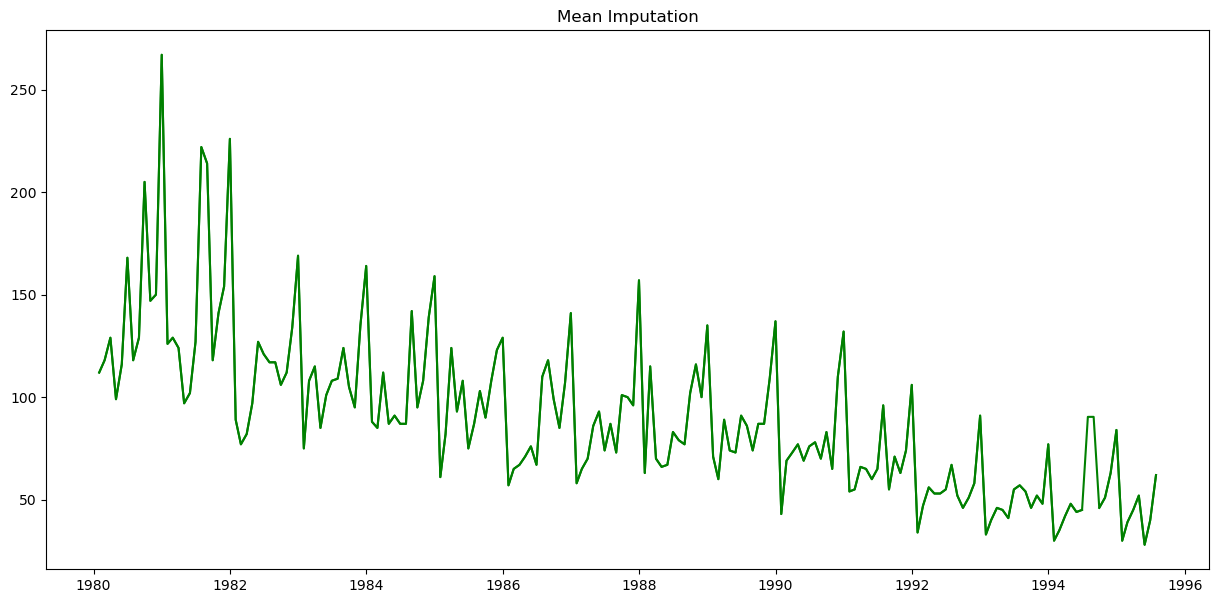

In [2515]:
# Imputing with Mean
plt.rcParams['figure.figsize']=(15,7)

# fill the missing data using the mean of the present observations
dfmean = df1.assign(FillMean=df1.Rose.fillna(df1.Rose.mean()))

# pass the data and declared the colour of your curve, i.e., blue
plt.plot(dfmean, color='green')

plt.title('Mean Imputation')
plt.show()


#This imputation is not good for analysis as it is showing abrupt trend change

In [2516]:
df1.describe()

Rose
count  185.000000
mean    90.394595
std     39.175344
min     28.000000
25%     63.000000
50%     86.000000
75%    112.000000
max    267.000000

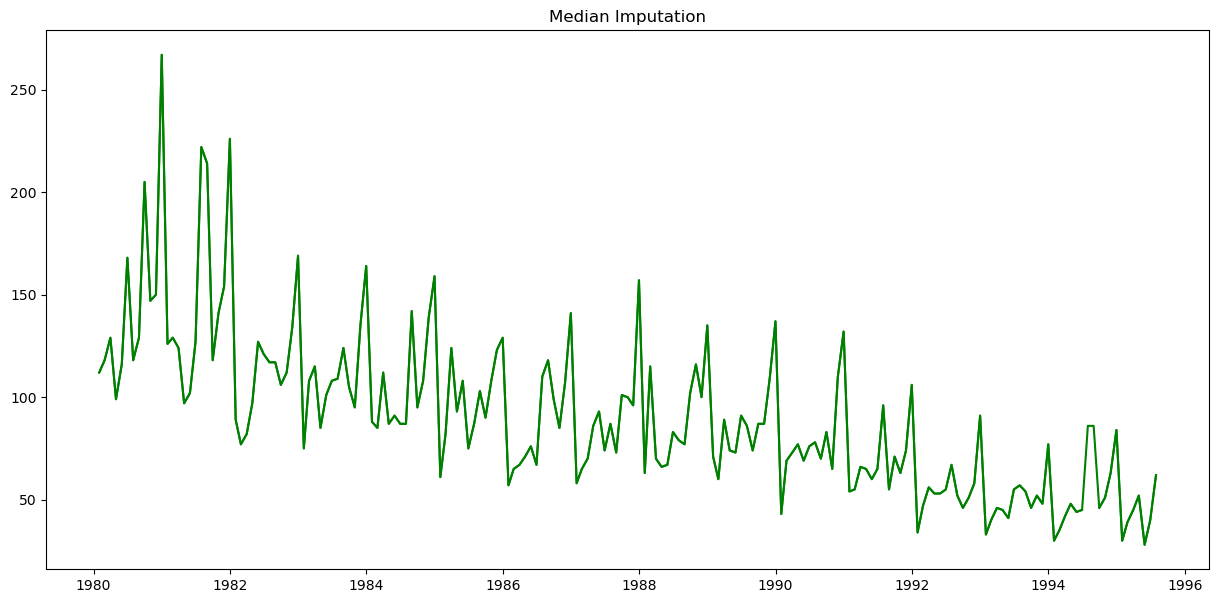

In [2517]:
# median imputation
plt.rcParams['figure.figsize']=(15,7)

# fill the missing data using the of the present observations
dfmedian = df1.assign(FillMean=df1.Rose.fillna(df1.Rose.median()))

# pass the data and declared the colouyr opf our curve as blue
plt.plot(dfmedian, color='green')

plt.title('Median Imputation')
plt.show()


# this is also not suitable due to abrupt change in pattern

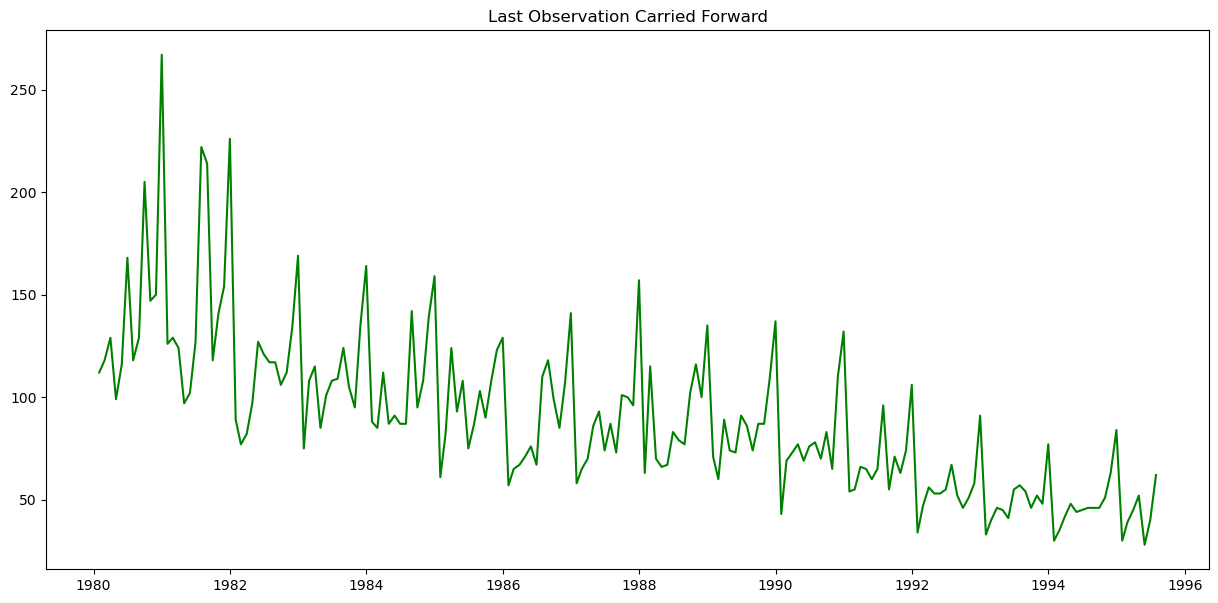

In [2518]:
# Using LOCF Last observation Carried forward method

plt.rcParams['figure.figsize']=(15,7)

# On the customer column of our data, impute the missing values with the LOCF
dflocf= df1['Rose'].fillna(method ='bfill')

# plot our time series with imputed values
plt.plot(dflocf, color='green')

plt.title('Last Observation Carried Forward')
plt.show()


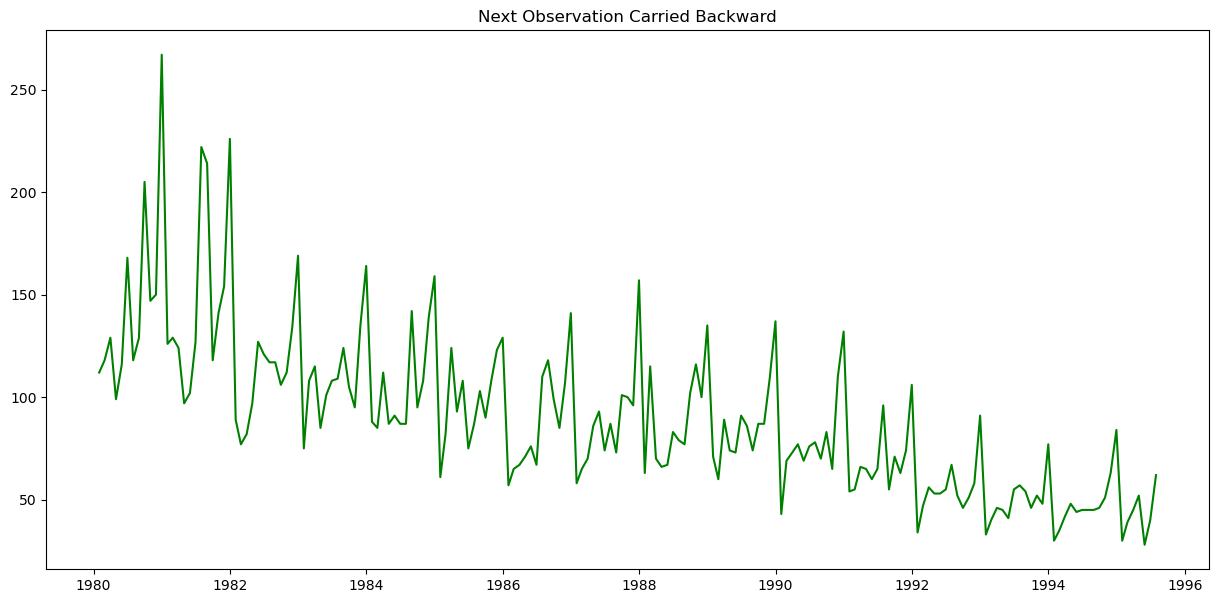

In [2519]:
#using next observation carried forward

plt.rcParams['figure.figsize']=(15,7)

# On the customer column of our data, impute the missing values with the LOCF
dfnocf= df1['Rose'].fillna(method ='ffill')

# plot our time series with imputed values
plt.plot(dfnocf, color='green')

plt.title('Next Observation Carried Backward')
plt.show()


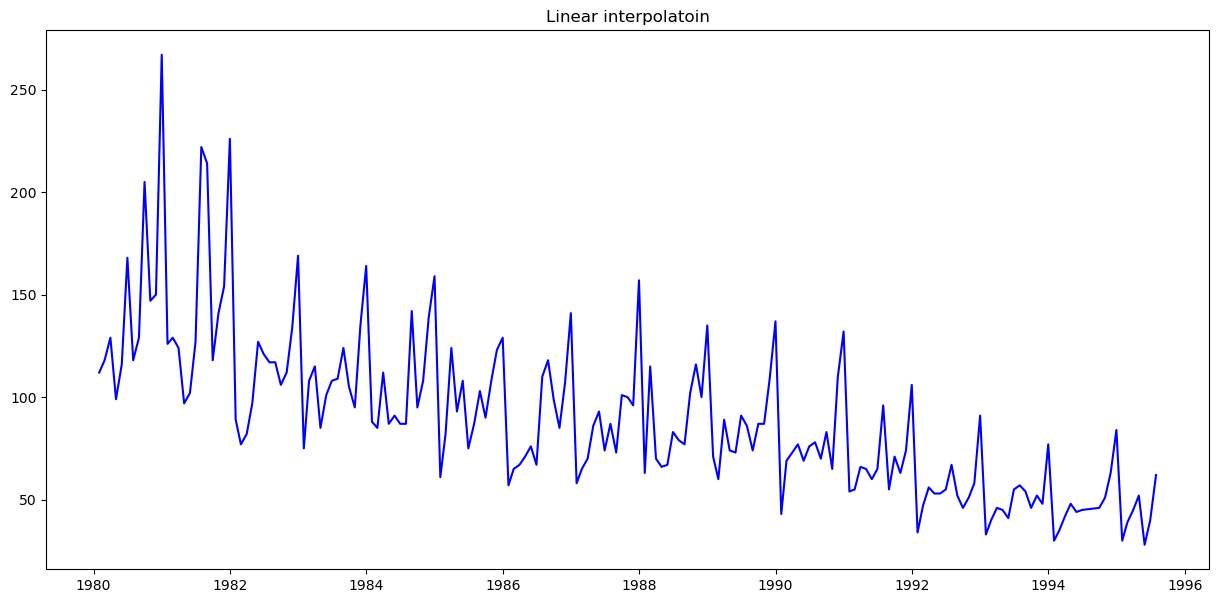

In [2520]:
# Using Linear interpolation

plt.rcParams['figure.figsize']=(15,7)

# on our data, impute the missing values using rolling window method
dfli= df1['Rose'].interpolate(method='linear')

# plot the complete dataset
plt.plot(dfli, color='blue')

plt.title('Linear interpolatoin')
plt.show()


In [2146]:
df1.isnull().sum()

Rose    2
dtype: int64

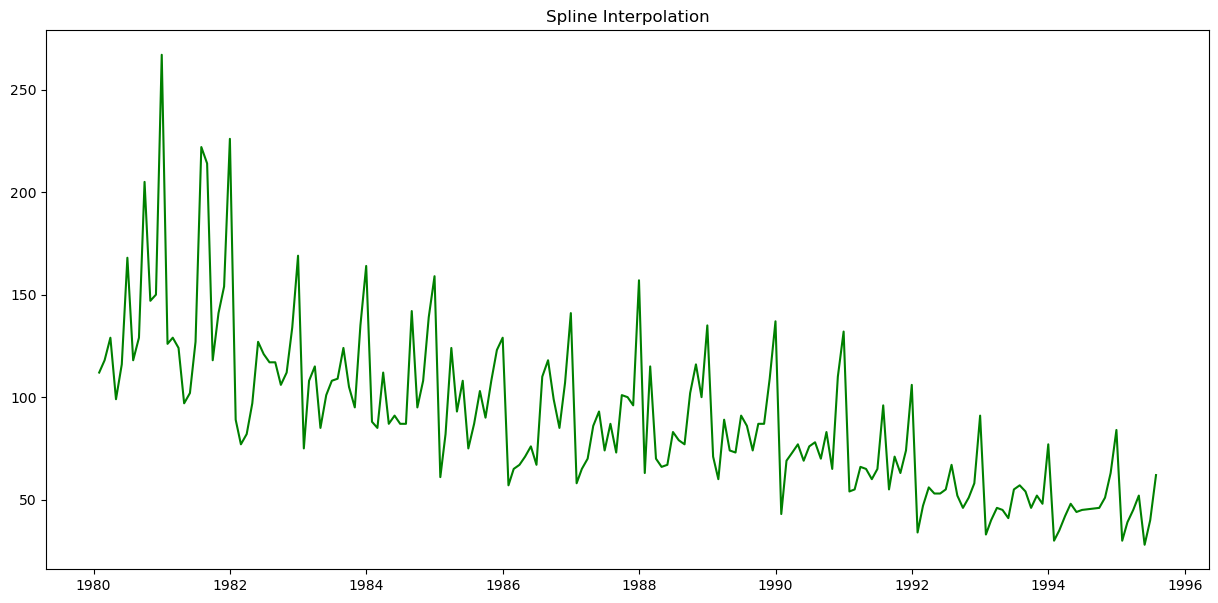

In [2147]:
# Spline Interpolation

plt.rcParams['figure.figsize']=(15,7)

# on our data, impute the missing values using the interpolation techniques and specifically, the lineare method
dfsi= df1['Rose'].interpolate(option='spline')

# plot the complete dataset
plt.plot(dfsi, color='green')

plt.title('Spline Interpolation')
plt.show()


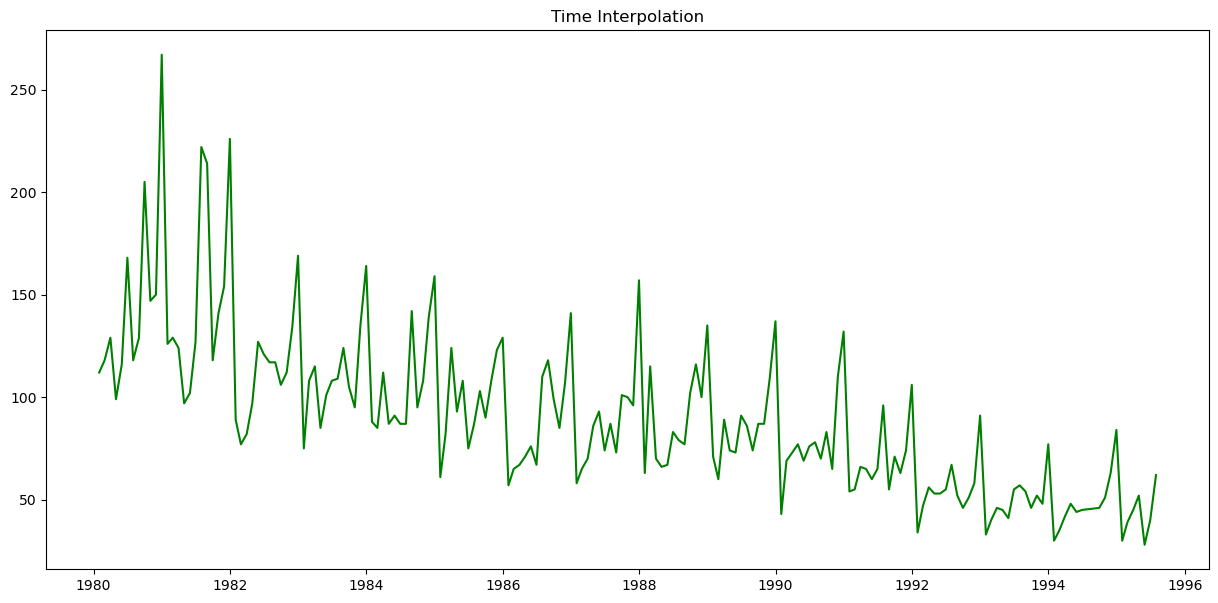

In [2148]:
# Spline Interpolation

plt.rcParams['figure.figsize']=(15,7)

# on our data, impute the missing values using the interpolation techniques and specifically, the lineare method
dft= df1['Rose'].interpolate(option='time')

# plot the complete dataset
plt.plot(dft, color='green')

plt.title('Time Interpolation')
plt.show()

In [2149]:
#We will be using spline interpolation for imputation and work with df2 data set which has no null values
#Checking NUll values again

dft.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 187 entries, 1980-01-31 to 1995-07-31
Series name: Rose
Non-Null Count  Dtype  
--------------  -----  
187 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB


In [2150]:
df2=df1.interpolate(method='time')
df2.isnull().sum()


Rose    0
dtype: int64

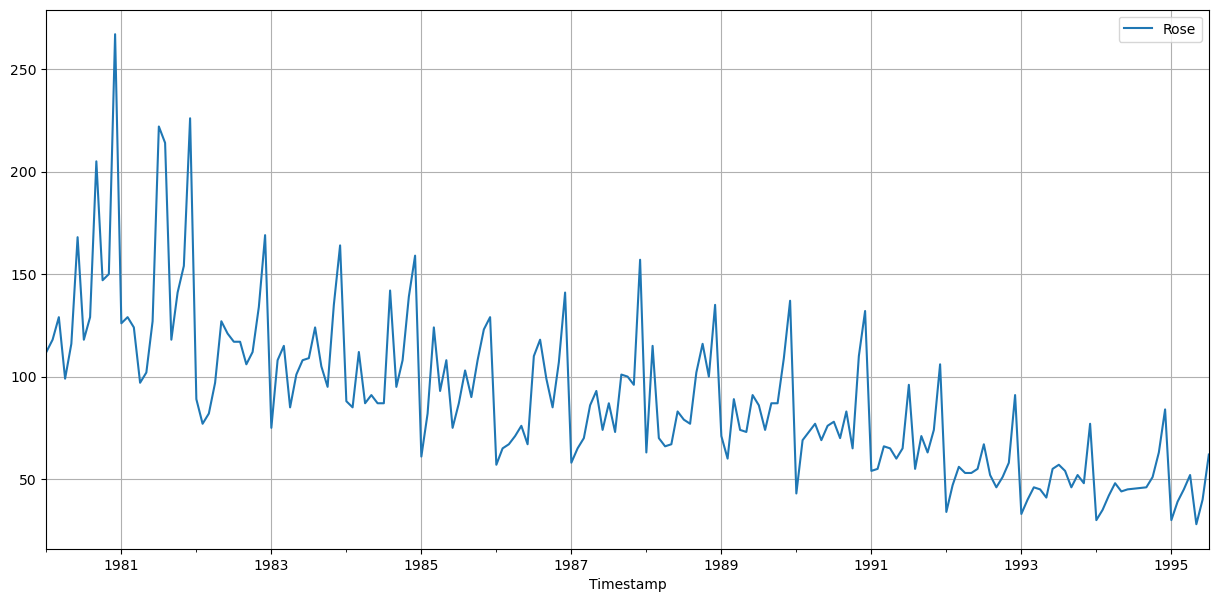

In [2151]:
df2.plot();
plt.grid()


In [2152]:
df2.describe()

Rose
count  187.000000
mean    89.914497
std     39.238259
min     28.000000
25%     62.500000
50%     85.000000
75%    111.000000
max    267.000000

In [2153]:
df1.describe()

Rose
count  185.000000
mean    90.394595
std     39.175344
min     28.000000
25%     63.000000
50%     86.000000
75%    112.000000
max    267.000000

Text(0.5, 1.0, 'Yearly Boxplot')

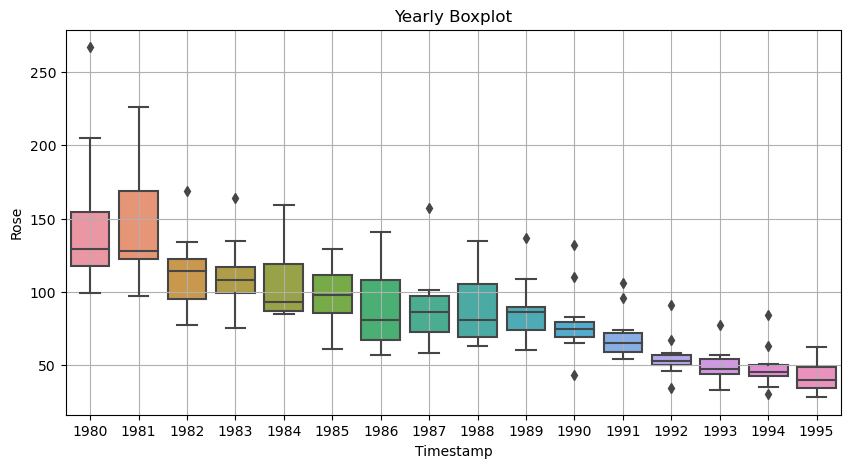

In [2154]:
#Yearly boxplot before imputation
plt.rcParams['figure.figsize']=(10,5)
sns.boxplot(x = df1.index.year,y = df1['Rose'])
plt.grid();
plt.title('Yearly Boxplot')

Text(0.5, 1.0, 'Yearly Boxplot after Interpolation')

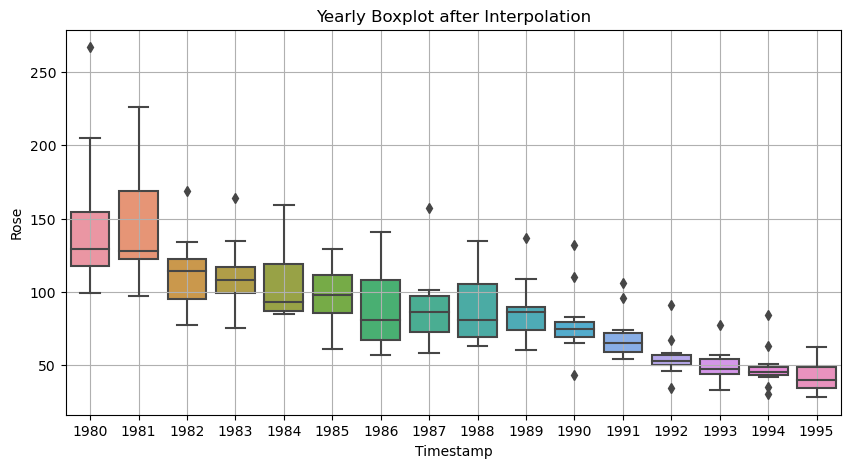

In [2157]:
#Yearly boxplot after imputation
plt.rcParams['figure.figsize']=(10,5)
sns.boxplot(x = df2.index.year,y = df2['Rose'])
plt.grid();
plt.title('Yearly Boxplot after Interpolation')

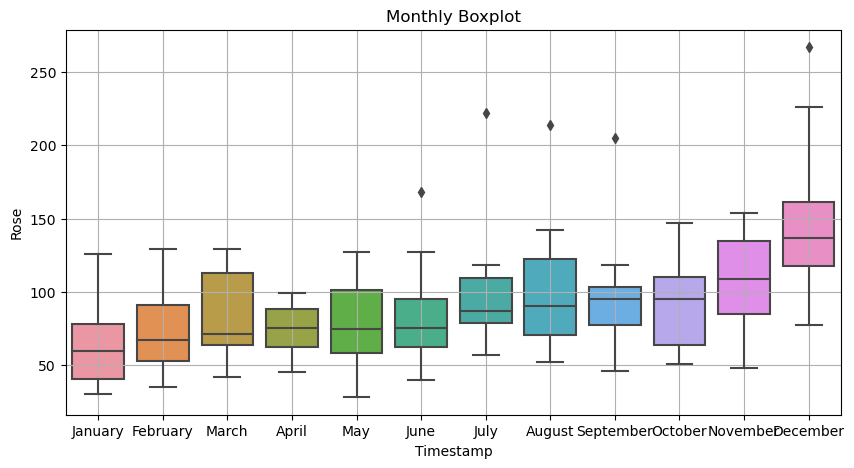

In [2158]:
#monthly boxplot
plt.rcParams['figure.figsize']=(10,5)
sns.boxplot(x = df1.index.month_name(),y = df['Rose'])
plt.title('Monthly Boxplot')
plt.grid();

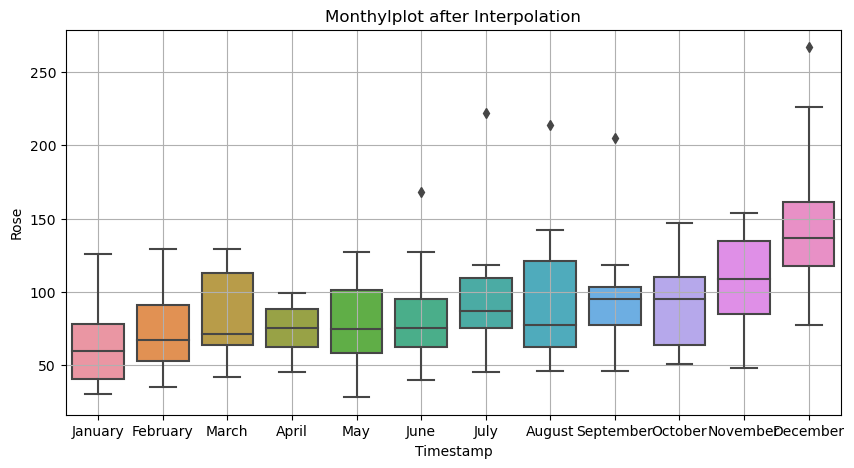

In [2159]:
#monthly boxplot
plt.rcParams['figure.figsize']=(10,5)
sns.boxplot(x = df2.index.month_name(),y = df2['Rose'])
plt.title('Monthylplot after Interpolation')
plt.grid();

#Plot a time series monthplot to understand the spread of accidents across different years and within different months across years.

Text(0.5, 1.0, 'Monthly Spread accoss years')

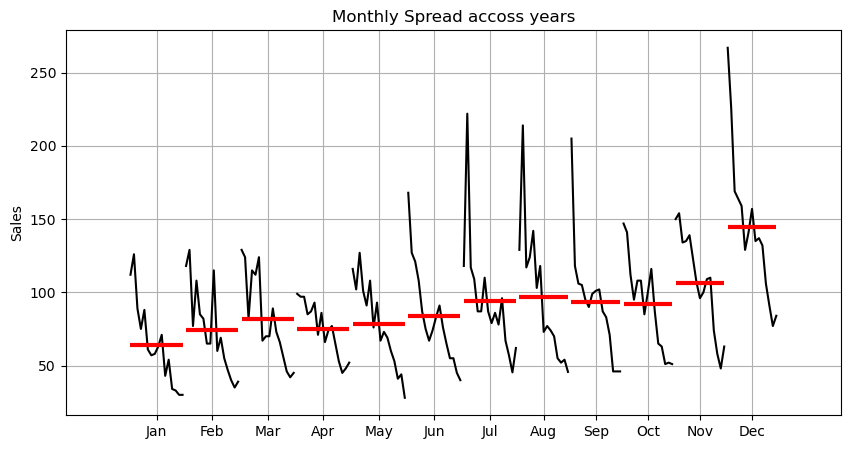

In [2160]:
from statsmodels.graphics.tsaplots import month_plot
plt.rcParams['figure.figsize']=(10,5)
month_plot(df2['Rose'],ylabel='Sales')
plt.grid();
plt.title('Monthly Spread accoss years')

In [2161]:
# Plot graph of monthly sales accross years

monthly_sales_across_years = pd.pivot_table(df2, values = 'Rose', columns = df2.index.month_name(), index = df2.index.year)
monthly_sales_across_years

Timestamp  April      August  December  February  January        July   June  \
Timestamp                                                                      
1980        99.0  129.000000     267.0     118.0    112.0  118.000000  168.0   
1981        97.0  214.000000     226.0     129.0    126.0  222.000000  127.0   
1982        97.0  117.000000     169.0      77.0     89.0  117.000000  121.0   
1983        85.0  124.000000     164.0     108.0     75.0  109.000000  108.0   
1984        87.0  142.000000     159.0      85.0     88.0   87.000000   87.0   
1985        93.0  103.000000     129.0      82.0     61.0   87.000000   75.0   
1986        71.0  118.000000     141.0      65.0     57.0  110.000000   67.0   
1987        86.0   73.000000     157.0      65.0     58.0   87.000000   74.0   
1988        66.0   77.000000     135.0     115.0     63.0   79.000000   83.0   
1989        74.0   74.000000     137.0      60.0     71.0   86.000000   91.0   
1990        77.0   70.000000     132.0      69.0     43.0   78.000000   76.0   
1991        65.0   55.000000     106.0      55.0     54.0   96.000000   65.0   
1992        53.0   52.000000      91.0      47.0     34.0   67.000000   55.0   
1993        45.0   54.000000      77.0      40.0     33.0   57.000000   55.0   
1994        48.0   45.673913      84.0      35.0     30.0   45.336957   45.0   
1995        52.0         NaN       NaN      39.0     30.0   62.000000   40.0   

Timestamp  March    May  November  October  September  
Timestamp                                              
1980       129.0  116.0     150.0    147.0      205.0  
1981       124.0  102.0     154.0    141.0      118.0  
1982        82.0  127.0     134.0    112.0      106.0  
1983       115.0  101.0     135.0     95.0      105.0  
1984       112.0   91.0     139.0    108.0       95.0  
1985       124.0  108.0     123.0    108.0       90.0  
1986        67.0   76.0     107.0     85.0       99.0  
1987        70.0   93.0      96.0    100.0      101.0  
1988        70.0   67.0     100.0    116.0      102.0  
1989        89.0   73.0     109.0     87.0       87.0  
1990        73.0   69.0     110.0     65.0       83.0  
1991        66.0   60.0      74.0     63.0       71.0  
1992        56.0   53.0      58.0     51.0       46.0  
1993        46.0   41.0      48.0     52.0       46.0  
1994        42.0   44.0      63.0     51.0       46.0  
1995        45.0   28.0       NaN      NaN        NaN

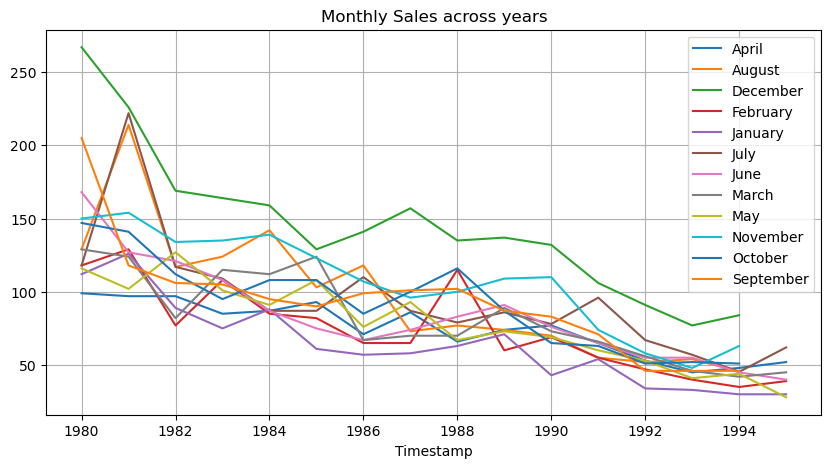

In [2162]:
monthly_sales_across_years.plot(figsize=(10,5))
plt.grid()
plt.title('Monthly Sales across years')
plt.legend(loc='best');

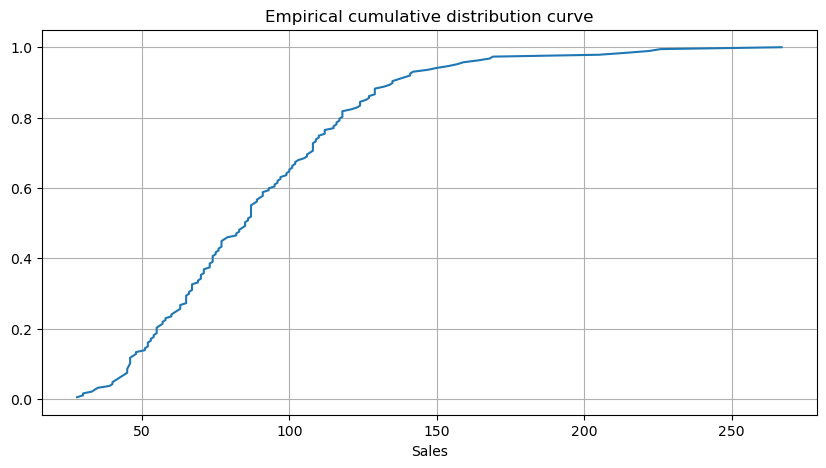

In [1861]:
# plot empirical cumulative distribution

# statistics
from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize = (10, 5))
cdf = ECDF(df2['Rose'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.xlabel('Sales')
plt.title('Empirical cumulative distribution curve');

In [2163]:
# Decompose time series

from    statsmodels.tsa.seasonal import   seasonal_decompose

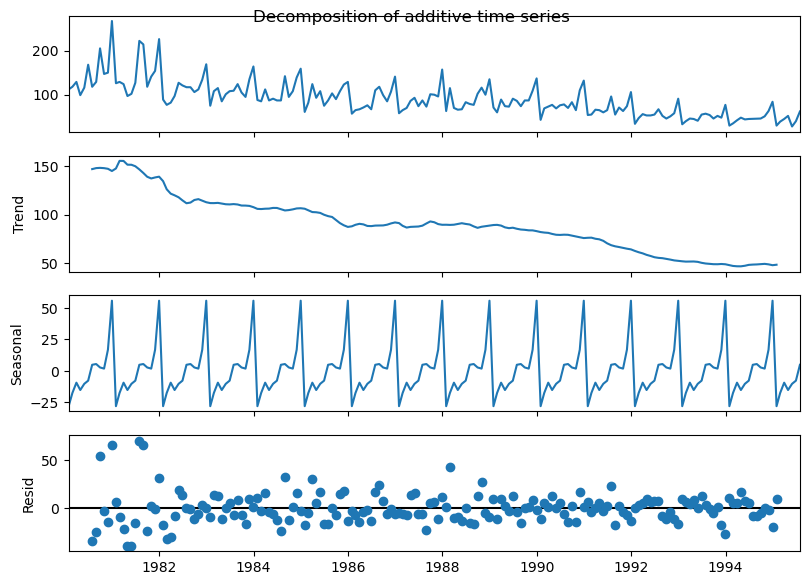

In [2164]:
decomposition = seasonal_decompose(df2,model='additive')

fig = decomposition.plot()
fig.set_figwidth(8)
fig.set_figheight(6)
fig.suptitle('Decomposition of additive time series')
plt.show()

In [1865]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.round(2).head(12),'\n')
print('Seasonality','\n',seasonality.round(2).head(12),'\n')
print('Residual','\n',residual.round(2).head(12),'\n')

Trend 
 Timestamp
1980-01-31       NaN
1980-02-29       NaN
1980-03-31       NaN
1980-04-30       NaN
1980-05-31       NaN
1980-06-30       NaN
1980-07-31    147.08
1980-08-31    148.12
1980-09-30    148.37
1980-10-31    148.08
1980-11-30    147.42
1980-12-31    145.12
Name: trend, dtype: float64 

Seasonality 
 Timestamp
1980-01-31   -27.91
1980-02-29   -17.44
1980-03-31    -9.29
1980-04-30   -15.10
1980-05-31   -10.20
1980-06-30    -7.68
1980-07-31     4.90
1980-08-31     5.50
1980-09-30     2.77
1980-10-31     1.87
1980-11-30    16.85
1980-12-31    55.71
Name: seasonal, dtype: float64 

Residual 
 Timestamp
1980-01-31      NaN
1980-02-29      NaN
1980-03-31      NaN
1980-04-30      NaN
1980-05-31      NaN
1980-06-30      NaN
1980-07-31   -33.98
1980-08-31   -24.63
1980-09-30    53.85
1980-10-31    -2.96
1980-11-30   -14.26
1980-12-31    66.16
Name: resid, dtype: float64 



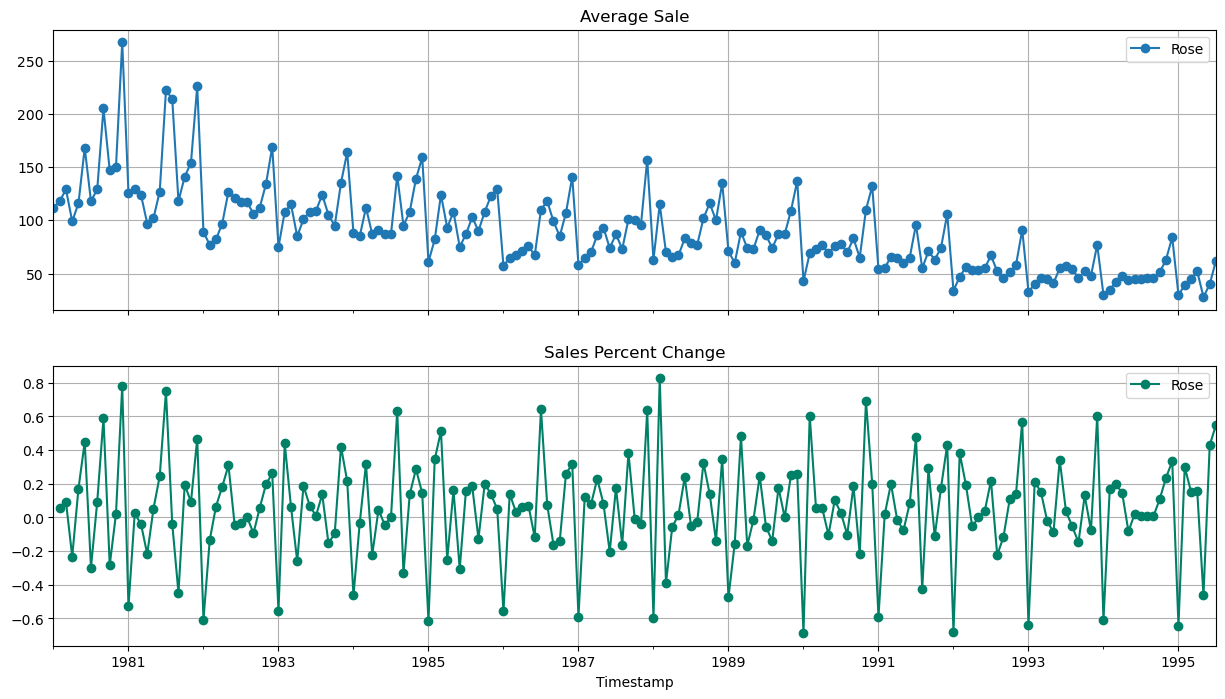

In [2168]:
# group by date and get average RetailSales, and precent change
plt.rcParams['figure.figsize']=(10,5)
average    = df2.groupby(df2.index)["Rose"].mean()
pct_change = df2.groupby(df2.index)["Rose"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average RetailSales over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Sale",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for RetailSales over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="Sales Percent Change",grid=True)

In [1867]:
#Test Train split

train    =   df2[0:int(len(df)*0.7)] 
test     =   df2[int(len(df)*0.7):]

In [1868]:
print(train.shape)
print(test.shape)

(130, 1)
(57, 1)


In [1869]:
train.isnull().sum()

Rose    0
dtype: int64

In [1870]:
test.isnull().sum()

Rose    0
dtype: int64

In [1871]:
print('First few rows of Training Data','\n',train.head(),'\n')
print('Last few rows of Training Data','\n',train.tail(),'\n')
print('First few rows of Test Data','\n',test.head(),'\n')
print('Last few rows of Test Data','\n',test.tail(),'\n')

First few rows of Training Data 
              Rose
Timestamp        
1980-01-31  112.0
1980-02-29  118.0
1980-03-31  129.0
1980-04-30   99.0
1980-05-31  116.0 

Last few rows of Training Data 
             Rose
Timestamp       
1990-06-30  76.0
1990-07-31  78.0
1990-08-31  70.0
1990-09-30  83.0
1990-10-31  65.0 

First few rows of Test Data 
              Rose
Timestamp        
1990-11-30  110.0
1990-12-31  132.0
1991-01-31   54.0
1991-02-28   55.0
1991-03-31   66.0 

Last few rows of Test Data 
             Rose
Timestamp       
1995-03-31  45.0
1995-04-30  52.0
1995-05-31  28.0
1995-06-30  40.0
1995-07-31  62.0 



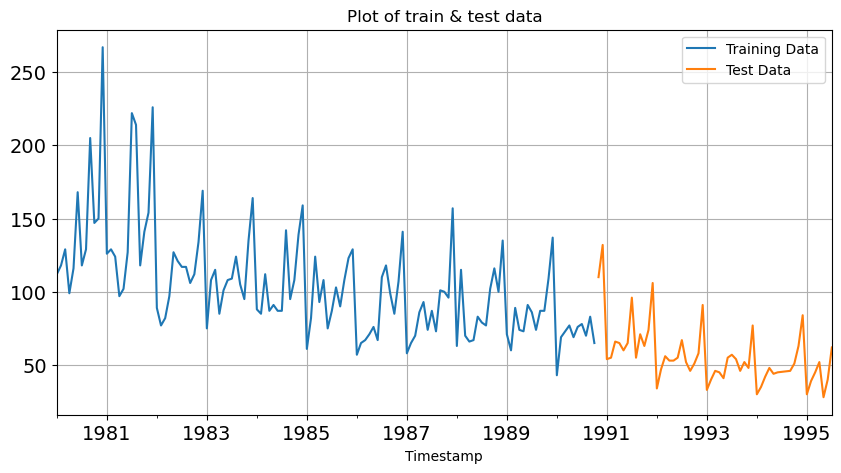

In [2170]:
train['Rose'].plot(figsize=(10,5), fontsize=14)
test['Rose'].plot(figsize=(10,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.title('Plot of train & test data')
plt.show()

# 3. Model Building - Original Data
- Build forecasting models - Linear regression - Simple Average - Moving Average - Exponential Models (Single, Double, Triple) - Check the performance of the models built


In [2312]:
# LINER REGRESSION MODEL



train_time = [i+1 for i in range(len(train))]
test_time = [i+57 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130]
Test Time instance 
 [57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113]


In [2173]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [2174]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
              Rose  time
Timestamp              
1980-01-31  112.0     1
1980-02-29  118.0     2
1980-03-31  129.0     3
1980-04-30   99.0     4
1980-05-31  116.0     5 

Last few rows of Training Data 
             Rose  time
Timestamp             
1990-06-30  76.0   126
1990-07-31  78.0   127
1990-08-31  70.0   128
1990-09-30  83.0   129
1990-10-31  65.0   130 

First few rows of Test Data 
              Rose  time
Timestamp              
1990-11-30  110.0    57
1990-12-31  132.0    58
1991-01-31   54.0    59
1991-02-28   55.0    60
1991-03-31   66.0    61 

Last few rows of Test Data 
             Rose  time
Timestamp             
1995-03-31  45.0   109
1995-04-30  52.0   110
1995-05-31  28.0   111
1995-06-30  40.0   112
1995-07-31  62.0   113 




Now that our training and test data has been modified, let us go ahead use  LinearRegression_ to build the model on the training data and test the model on the test data.



In [2175]:
from sklearn.linear_model import LinearRegression

In [2176]:
lr = LinearRegression()

In [2177]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Rose'].values)

LinearRegression()

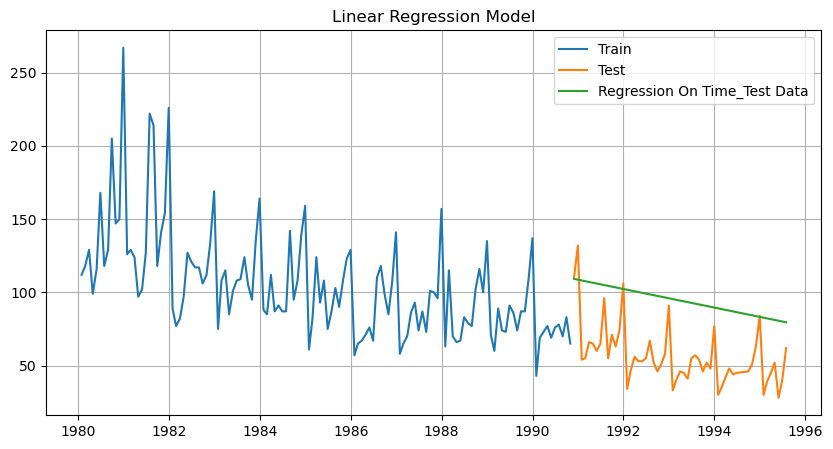

In [2180]:
test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(10,5))
plt.plot( train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.title('Linear Regression Model')
plt.grid();

In [2313]:
# Defining accuracy metrics

from sklearn import metrics

In [2314]:
# Model Evaluation

rmse_model1_test = metrics.mean_squared_error(test['Rose'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f " %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 41.912 


In [2315]:


resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf

Test RMSE
RegressionOnTime  41.911775

In [2316]:
## Mean Absolute Percentage Error (MAPE) - Function Definition 
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100 

RMSE = metrics.mean_squared_error(test['Rose'],test_predictions_model1,squared=False) 

MAPE = mean_absolute_percentage_error(test['Rose'],test_predictions_model1) 

resultsDf = pd.DataFrame({'Test RMSE': [RMSE],'Test MAPE':[MAPE]} ,index=['Regression on Time']) 

resultsDf

Test RMSE  Test MAPE
Regression on Time  41.911775  83.691988

In [2317]:
# Method 2: Simple Average



SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [2318]:
SimpleAverage_test['mean_forecast'] = train['Rose'].mean()
SimpleAverage_test.head()

Rose  mean_forecast
Timestamp                       
1990-11-30  110.0     104.692308
1990-12-31  132.0     104.692308
1991-01-31   54.0     104.692308
1991-02-28   55.0     104.692308
1991-03-31   66.0     104.692308

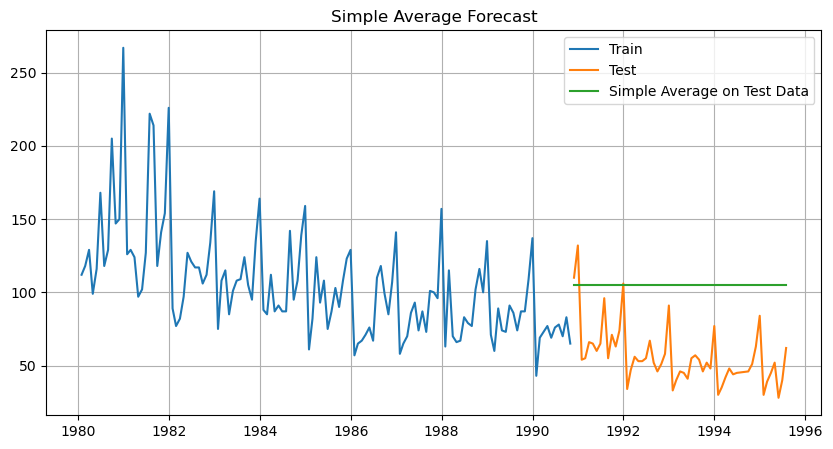

In [2319]:
plt.plot(SimpleAverage_train['Rose'], label='Train')
plt.plot(SimpleAverage_test['Rose'], label='Test')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [2320]:
#model evaluation

rmse_model2_test = metrics.mean_squared_error(test['Rose'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For Simple Average forecast on the Test Data,  RMSE is 52.412


In [2321]:

MAPE = mean_absolute_percentage_error(test['Rose'],SimpleAverage_test['mean_forecast']) 

resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test],'Test MAPE':[MAPE]} ,index=['SimpleAverageModel']) 
resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

Test RMSE   Test MAPE
Regression on Time  41.911775   83.691988
SimpleAverageModel  52.411878  106.684127

#### Moving Average Model: 
For the moving average model, we are going to calculate rolling means (or moving averages) for different intervals. The best interval can be determined by the maximum accuracy (or the minimum error) over here.
For Moving Average, we are going to average over the entire data.

In [2322]:
MovingAverage = df2.copy()
MovingAverage.head()

Rose
Timestamp        
1980-01-31  112.0
1980-02-29  118.0
1980-03-31  129.0
1980-04-30   99.0
1980-05-31  116.0

In [2323]:
MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Rose'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Rose'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Rose'].rolling(9).mean()

MovingAverage.head()

Rose  Trailing_2  Trailing_4  Trailing_6  Trailing_9
Timestamp                                                        
1980-01-31  112.0         NaN         NaN         NaN         NaN
1980-02-29  118.0       115.0         NaN         NaN         NaN
1980-03-31  129.0       123.5         NaN         NaN         NaN
1980-04-30   99.0       114.0       114.5         NaN         NaN
1980-05-31  116.0       107.5       115.5         NaN         NaN

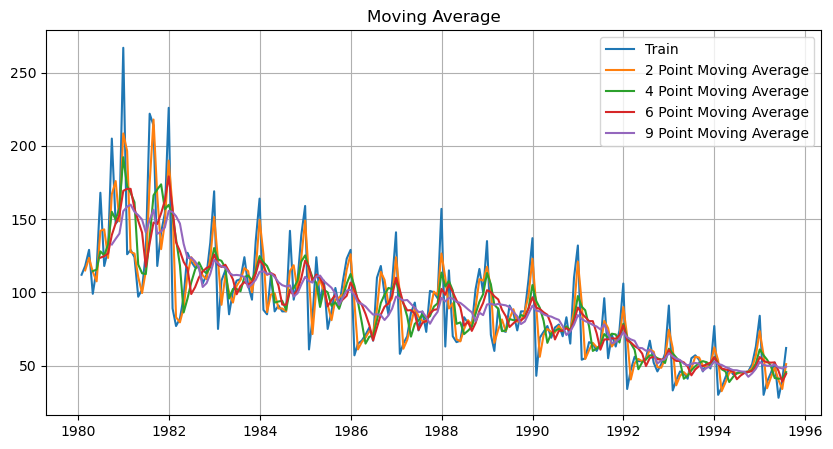

In [2324]:
## Plotting on the whole data

plt.plot(MovingAverage['Rose'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')
plt.title('Moving Average')
plt.legend(loc = 'best')
plt.grid();

Let us split the data into train and test and plot this Time Series. The window of the moving average is need to be carefully selected as too big a window will result in not having any test set as the whole series might get averaged over.

In [2325]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[0:int(len(MovingAverage)*0.7)] 
trailing_MovingAverage_test=MovingAverage[int(len(MovingAverage)*0.7):]

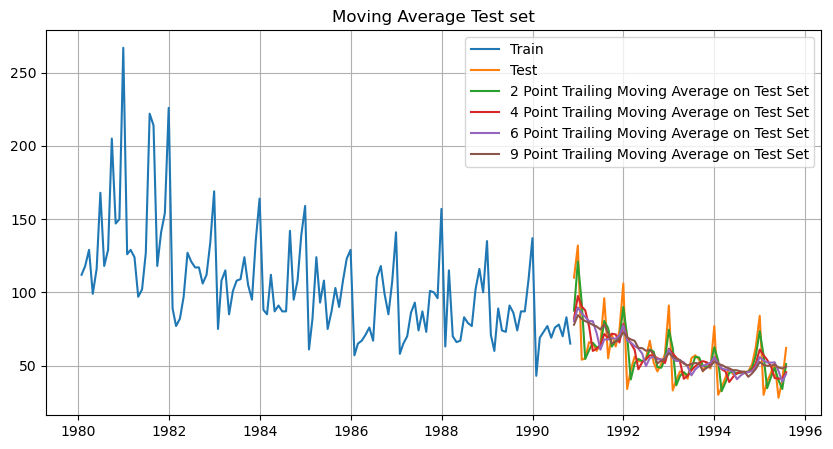

In [2326]:
## Plotting on both the Training and Test data

plt.figure(figsize=(10,5))
plt.plot(trailing_MovingAverage_train['Rose'], label='Train')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test')


plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.title('Moving Average Test set')
plt.legend(loc = 'best')
plt.grid();

Model Evaluation

In [2327]:

## Test Data - RMSE  --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 11.801
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 15.367
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 15.862
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 16.342


In [2328]:
MAPE_model4_test2 = mean_absolute_percentage_error(test['Rose'],trailing_MovingAverage_test['Trailing_2']) 
MAPE_model4_test4 = mean_absolute_percentage_error(test['Rose'],trailing_MovingAverage_test['Trailing_4'])
MAPE_model4_test6 = mean_absolute_percentage_error(test['Rose'],trailing_MovingAverage_test['Trailing_6'])
MAPE_model4_test9 = mean_absolute_percentage_error(test['Rose'],trailing_MovingAverage_test['Trailing_9'])



print ('MAPE_model4_test2:', round(MAPE_model4_test2,2))

MAPE_model4_test2: 15.65


In [2329]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9], 
                            'Test MAPE':[MAPE_model4_test2,MAPE_model4_test4,MAPE_model4_test6,MAPE_model4_test9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

Test RMSE   Test MAPE
Regression on Time           41.911775   83.691988
SimpleAverageModel           52.411878  106.684127
2pointTrailingMovingAverage  11.801043   15.650788
4pointTrailingMovingAverage  15.367176   21.427345
6pointTrailingMovingAverage  15.862298   22.594297
9pointTrailingMovingAverage  16.341888   22.994221

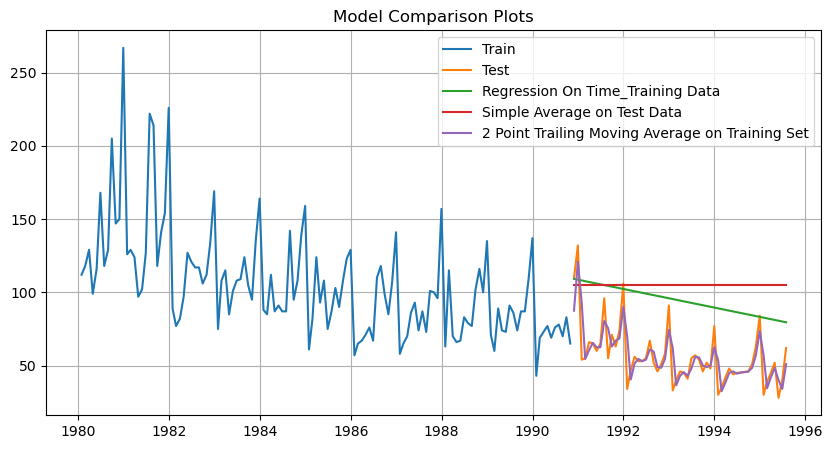

In [2330]:
## Plotting on both Training and Test data

plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Training Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

### Smiple Exponential smoothening

In [2331]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [2332]:
SES_train = train.copy()
SES_test = test.copy()

In [2333]:
model_SES = SimpleExpSmoothing(SES_train['Rose'])

In [2334]:
model_SES_autofit = model_SES.fit(optimized=True)

In [2335]:
model_SES_autofit.params

{'smoothing_level': 0.1277774077775358,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 112.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [2336]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

Rose    predict
Timestamp                   
1990-11-30  110.0  77.599284
1990-12-31  132.0  77.599284
1991-01-31   54.0  77.599284
1991-02-28   55.0  77.599284
1991-03-31   66.0  77.599284

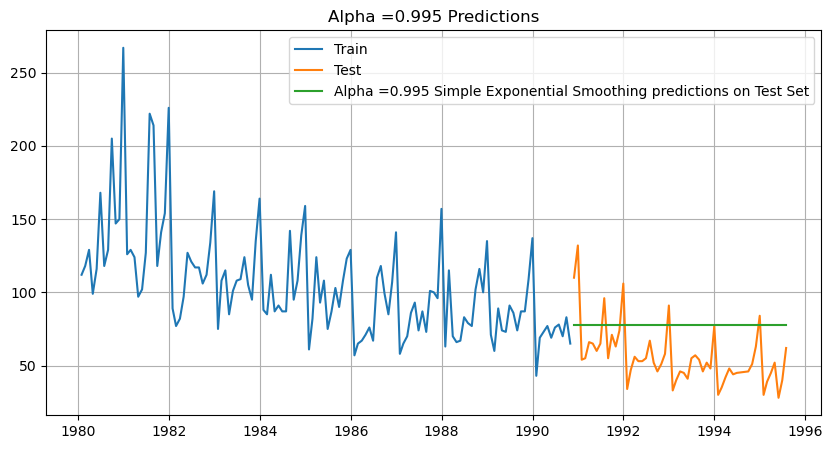

In [2337]:
## Plotting on both the Training and Test data

plt.figure(figsize=(10,5))
plt.plot(SES_train['Rose'], label='Train')
plt.plot(SES_test['Rose'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.995 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.995 Predictions');

In [2338]:
# Model evaluation for alpha=.995
## Test Data

rmse_model5_test_1 = metrics.mean_squared_error(SES_test['Rose'],SES_test['predict'],squared=False)
print("For Alpha =0.995 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test_1))

For Alpha =0.995 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 29.223


In [2339]:
mape_model5_test_1 = mean_absolute_percentage_error(SES_test['Rose'],SES_test['predict']) 




print ('MAPE Value is', round(mape_model5_test_1,2))

MAPE Value is 57.38


In [2340]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1], 'Test MAPE':[mape_model5_test_1] },index=['Alpha=0.995,SimpleExponentialSmoothing'])


resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

Test RMSE   Test MAPE
Regression on Time                      41.911775   83.691988
SimpleAverageModel                      52.411878  106.684127
2pointTrailingMovingAverage             11.801043   15.650788
4pointTrailingMovingAverage             15.367176   21.427345
6pointTrailingMovingAverage             15.862298   22.594297
9pointTrailingMovingAverage             16.341888   22.994221
Alpha=0.995,SimpleExponentialSmoothing  29.223468   57.377615

In [2341]:
for i in np.arange(0.3,1.1,0.1):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=57)
        
    rmse_model5_train = metrics.mean_squared_error(SES_train['Rose'],SES_train['predict',i],squared=False)
        
    mape_model5_train = mean_absolute_percentage_error(SES_train['Rose'],SES_train['predict',i]) 
        
    rmse_model5_test = metrics.mean_squared_error(SES_test['Rose'],SES_test['predict',i],squared=False)
        
    mape_model5_test = mean_absolute_percentage_error(SES_test['Rose'],SES_test['predict',i]) 
        
        
    resultsDf_5 = resultsDf_5._append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model5_train ,
                                           'Test RMSE':mape_model5_train, 'Train MAPE':rmse_model5_test,
                                          'Test MAPE':mape_model5_test }, ignore_index=True)

In [2342]:
resultsDf_5.sort_values(by=['Test RMSE']).head()

Test RMSE  Test MAPE  Alpha Values  Beta Values  Train RMSE  Train MAPE
1  23.300951  50.203147           0.3          1.0   32.292266   26.310146
2  23.548129  48.512510           0.4          1.0   32.893017   25.657565
3  23.794400  47.041457           0.5          1.0   33.578304   25.109407
4  24.085749  45.447777           0.6          1.0   34.372651   24.529617
5  24.392563  43.644967           0.7          1.0   35.288467   23.894739

Setting different alpha values.
Remember, the higher the alpha value more weightage is given to the more recent observation. That means, what happened recently will happen again.
We will run a loop with different alpha values to understand which particular value works best for alpha on the test set.

### Double Exponential Smoothening

In [2343]:
DES_train = train.copy()
DES_test = test.copy()


In [2344]:
model_DES = Holt(DES_train['Rose'])

In [2345]:
model_DES_autofit = model_DES.fit(optimized=True)
model_DES_autofit.params

{'smoothing_level': 0.1519419621807617,
 'smoothing_trend': 0.1519419621807617,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 112.0,
 'initial_trend': 6.0,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [2346]:
DES_test['predict'] = model_DES_autofit.forecast(steps=len(test))
DES_test.head()

Rose    predict
Timestamp                   
1990-11-30  110.0  71.319113
1990-12-31  132.0  70.164359
1991-01-31   54.0  69.009605
1991-02-28   55.0  67.854852
1991-03-31   66.0  66.700098

In [2347]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_7

Empty DataFrame
Columns: [Alpha Values, Beta Values, Train RMSE, Test RMSE]
Index: []

In [2348]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_trend=j,optimized=False,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=57)
        
        rmse_model6_train = metrics.mean_squared_error(DES_train['Rose'],DES_train['predict',i,j],squared=False)
        
        mape_model6_train = mean_absolute_percentage_error(DES_train['Rose'],DES_train['predict',i,j]) 
        
        rmse_model6_test = metrics.mean_squared_error(DES_test['Rose'],DES_test['predict',i,j],squared=False)
        
        mape_model6_test = mean_absolute_percentage_error(DES_test['Rose'],DES_test['predict',i,j]) 
        
        
        resultsDf_7 = resultsDf_7._append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train ,
                                           'Test RMSE':rmse_model6_test, 'Train MAPE':mape_model6_train,
                                          'Test MAPE':mape_model6_test }, ignore_index=True)

In [2349]:
resultsDf_7

Alpha Values  Beta Values  Train RMSE   Test RMSE  Train MAPE    Test MAPE
0            0.3          0.3   35.792345   26.531561   26.703152    35.954881
1            0.3          0.4   37.287813   18.343319   28.067120    20.362591
2            0.3          0.5   38.841090   26.672171   29.466172    50.163990
3            0.3          0.6   40.299159   59.403596   30.996882   115.982824
4            0.3          0.7   41.486887   95.600067   32.326474   184.553542
..           ...          ...         ...         ...         ...          ...
59           1.0          0.6   52.018949  264.855603   38.813233   485.731031
60           1.0          0.7   54.697098  331.622834   40.881820   609.819837
61           1.0          0.8   57.575818  406.506817   43.045302   748.906105
62           1.0          0.9   60.691028  491.247774   45.336838   906.240050
63           1.0          1.0   64.093561  587.897592   48.002168  1085.640534

[64 rows x 6 columns]

In [2350]:
resultsDf_7.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values  Train RMSE  Test RMSE  Train MAPE  Test MAPE
1            0.3          0.4   37.287813  18.343319   28.067120  20.362591
12           0.4          0.7   40.744796  18.975210   31.171493  31.690856
9            0.4          0.4   37.990913  19.133035   28.237035  31.402784
17           0.5          0.4   38.598226  19.197255   28.274844  22.136719
8            0.4          0.3   36.682435  19.769884   27.084858  22.516895

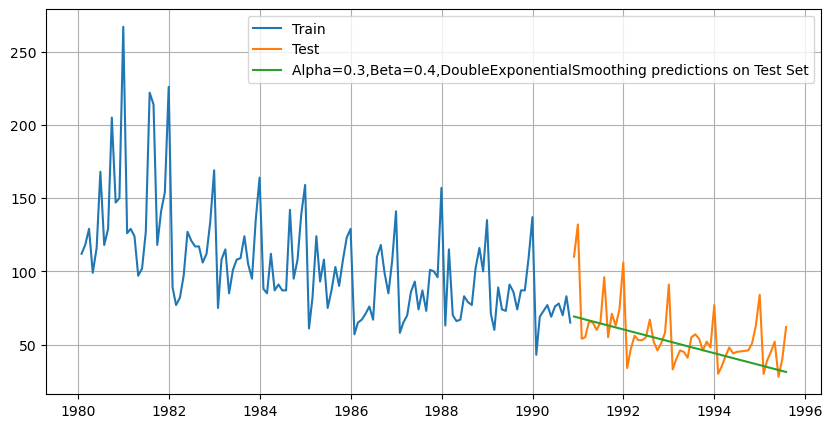

In [2351]:
## Plotting on both the Training and Test data

plt.figure(figsize=(10,5))
plt.plot(DES_train['Rose'], label='Train')
plt.plot(DES_test['Rose'], label='Test')

plt.plot(DES_test['predict', 0.3, 0.4], label='Alpha=0.3,Beta=0.4,DoubleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [2352]:
resultsDf_7_1 = pd.DataFrame({'Test RMSE': [resultsDf_7.sort_values(by=['Test RMSE']).values[0,3]],
                              'Test MAPE': [resultsDf_7.sort_values(by=['Test MAPE']).values[0,5]]}
                           ,index=['Alpha=0.3,Beta=0.4,DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7_1])
resultsDf

Test RMSE   Test MAPE
Regression on Time                             41.911775   83.691988
SimpleAverageModel                             52.411878  106.684127
2pointTrailingMovingAverage                    11.801043   15.650788
4pointTrailingMovingAverage                    15.367176   21.427345
6pointTrailingMovingAverage                    15.862298   22.594297
9pointTrailingMovingAverage                    16.341888   22.994221
Alpha=0.995,SimpleExponentialSmoothing         29.223468   57.377615
Alpha=0.3,Beta=0.4,DoubleExponentialSmoothing  18.343319   20.362591

## Method 5: Triple Exponential Smoothing (Holt - Winter's Model)

##### Three parameters $\alpha$, $\beta$ and $\gamma$ are estimated in this model. Level, Trend and Seasonality are accounted for in this model.

In [2353]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing


TES_train = train.copy()
TES_test = test.copy()

In [2354]:
model_TES = ExponentialSmoothing(TES_train['Rose'],trend='additive',seasonal='multiplicative',freq='M')

In [2355]:
model_TES_autofit = model_TES.fit()

In [2356]:
model_TES_autofit.params

{'smoothing_level': 0.09954161352526007,
 'smoothing_trend': 1.3336303508710234e-09,
 'smoothing_seasonal': 1.2069328449342624e-07,
 'damping_trend': nan,
 'initial_level': 158.17849976224244,
 'initial_trend': -0.6388610685846876,
 'initial_seasons': array([0.69310878, 0.78335434, 0.8565105 , 0.75118137, 0.84323397,
        0.90831655, 0.99998662, 1.06934491, 1.00122429, 0.98484092,
        1.13241501, 1.56136821]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [2357]:
## Prediction on the test data

TES_test['Predict'] = model_TES_autofit.forecast(steps=len(test))
TES_test.head()

Rose     Predict
Timestamp                    
1990-11-30  110.0   86.307069
1990-12-31  132.0  118.002257
1991-01-31   54.0   51.939718
1991-02-28   55.0   58.202028
1991-03-31   66.0   63.090227

In [2358]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_8_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_8_2

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Test RMSE]
Index: []

In [2359]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        for k in np.arange(0.3,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['Predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['Predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=57)
        
            rmse_model8_train = metrics.mean_squared_error(TES_train['Rose'],TES_train['Predict',i,j,k],squared=False)
            
            mape_model8_train = mean_absolute_percentage_error(TES_train['Rose'],TES_train['Predict',i,j,k])
            
            rmse_model8_test = metrics.mean_squared_error(TES_test['Rose'],TES_test['Predict',i,j,k],squared=False)
            
            mape_model8_test = mean_absolute_percentage_error(TES_train['Rose'],TES_train['Predict',i,j,k])
            
            resultsDf_8_2 = resultsDf_8_2._append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k, 
                                                   'Train RMSE':rmse_model8_train,'Train MAPE':mape_model8_train,
                                                   'Test RMSE':rmse_model8_test, 'Test MAPE': mape_model8_test 
                                                  }, ignore_index=True)

In [2360]:
resultsDf_8_2

Alpha Values  Beta Values  Gamma Values    Train RMSE     Test RMSE  \
0             0.3          0.3           0.3     23.385275     77.683411   
1             0.3          0.3           0.4     24.663714     85.240995   
2             0.3          0.3           0.5     26.315722     99.310504   
3             0.3          0.3           0.6     28.443126    116.444264   
4             0.3          0.3           0.7     31.169740    132.056421   
..            ...          ...           ...           ...           ...   
507           1.0          1.0           0.6   2156.016082   1764.935840   
508           1.0          1.0           0.7   3114.343611   5623.268820   
509           1.0          1.0           0.8   2455.974802   4317.158023   
510           1.0          1.0           0.9  29056.690526  30910.588574   
511           1.0          1.0           1.0   1588.932809   8368.146297   

      Train MAPE    Test MAPE  
0      17.007080    17.007080  
1      17.828178    17.828178  
2      18.987251    18.987251  
3      20.595842    20.595842  
4      22.566200    22.566200  
..           ...          ...  
507   710.039493   710.039493  
508  1085.119656  1085.119656  
509   752.501313   752.501313  
510  4645.107848  4645.107848  
511   695.076058   695.076058  

[512 rows x 7 columns]

In [2361]:
resultsDf_8_2.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values  Gamma Values  Train RMSE  Test RMSE  \
33            0.3          0.7           0.4   29.968505  28.363138   
177           0.5          0.9           0.4   41.232290  28.802260   
25            0.3          0.6           0.4   27.743621  39.657108   
78            0.4          0.4           0.9   43.001123  51.374786   
135           0.5          0.3           1.0   47.353331  62.161318   

     Train MAPE  Test MAPE  
33    21.874078  21.874078  
177   28.305264  28.305264  
25    18.977367  18.977367  
78    27.265674  27.265674  
135   28.995948  28.995948

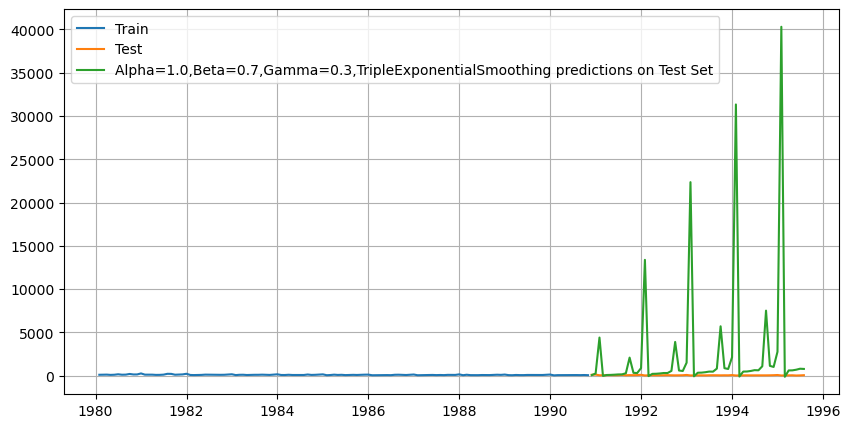

In [2362]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

plt.figure(figsize=(10,5))
plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')

#The value of alpha and beta is taken like that by python
plt.plot(TES_test['Predict', 1.0000000000000002, 0.7000000000000002, 0.3], label='Alpha=1.0,Beta=0.7,Gamma=0.3,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [2363]:
resultsDf_8_3 = pd.DataFrame({'Test RMSE': [resultsDf_8_2.sort_values(by=['Test RMSE']).values[0][4]],
                              'Test MAPE':[resultsDf_8_2.sort_values(by=['Test RMSE']).values[0][6]]}
                           ,index=['Alpha=1.0,Beta=0.7,Gamma=0.3,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_3])
resultsDf

Test RMSE   Test MAPE
Regression on Time                                  41.911775   83.691988
SimpleAverageModel                                  52.411878  106.684127
2pointTrailingMovingAverage                         11.801043   15.650788
4pointTrailingMovingAverage                         15.367176   21.427345
6pointTrailingMovingAverage                         15.862298   22.594297
9pointTrailingMovingAverage                         16.341888   22.994221
Alpha=0.995,SimpleExponentialSmoothing              29.223468   57.377615
Alpha=0.3,Beta=0.4,DoubleExponentialSmoothing       18.343319   20.362591
Alpha=1.0,Beta=0.7,Gamma=0.3,TripleExponentialS...  28.363138   21.874078

In [2364]:
print('Sorted by RMSE values on the Test Data:','\n',)
resultsDf.sort_values(by=['Test RMSE'])

Sorted by RMSE values on the Test Data: 



Test RMSE   Test MAPE
2pointTrailingMovingAverage                         11.801043   15.650788
4pointTrailingMovingAverage                         15.367176   21.427345
6pointTrailingMovingAverage                         15.862298   22.594297
9pointTrailingMovingAverage                         16.341888   22.994221
Alpha=0.3,Beta=0.4,DoubleExponentialSmoothing       18.343319   20.362591
Alpha=1.0,Beta=0.7,Gamma=0.3,TripleExponentialS...  28.363138   21.874078
Alpha=0.995,SimpleExponentialSmoothing              29.223468   57.377615
Regression on Time                                  41.911775   83.691988
SimpleAverageModel                                  52.411878  106.684127

For this data, we had both trend and seasonality so by definition Triple Exponential Smoothing is supposed to work better than the Simple Exponential Smoothing as well as the Double Exponential Smoothing. However, since this was a model building exercise we had gone on to build different models on the data and have compared these model with the best RMSE value on the test data.

In [2365]:
rmse_model4_test_2 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 11.801


0:00:00.052728


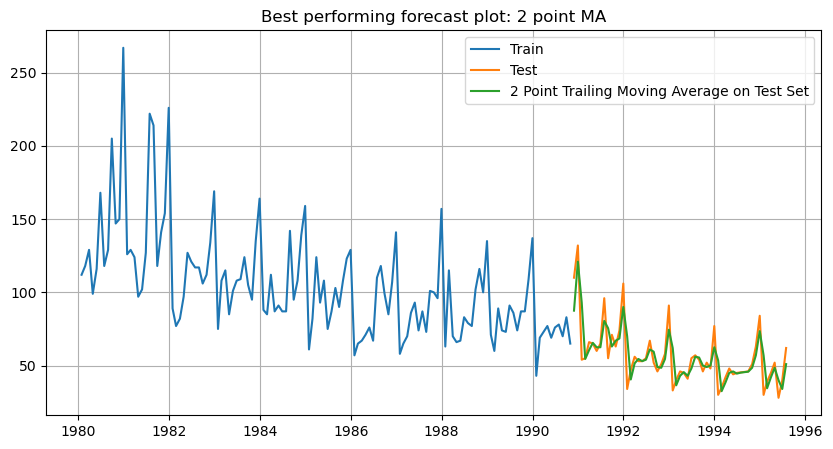

In [2366]:
start = datetime.now()
plt.figure(figsize=(10,5))
plt.plot(trailing_MovingAverage_train['Rose'], label='Train')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test')

#plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')


plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.title('Best performing forecast plot: 2 point MA')
plt.legend(loc = 'best')
plt.grid();

end=datetime.now()

print(end-start)

In [2367]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-31 to 1995-07-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    187 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB


## 4. Check for Stationarity
- Check for stationarity - Make the data stationary (if needed)


In [2368]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=2).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=2).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

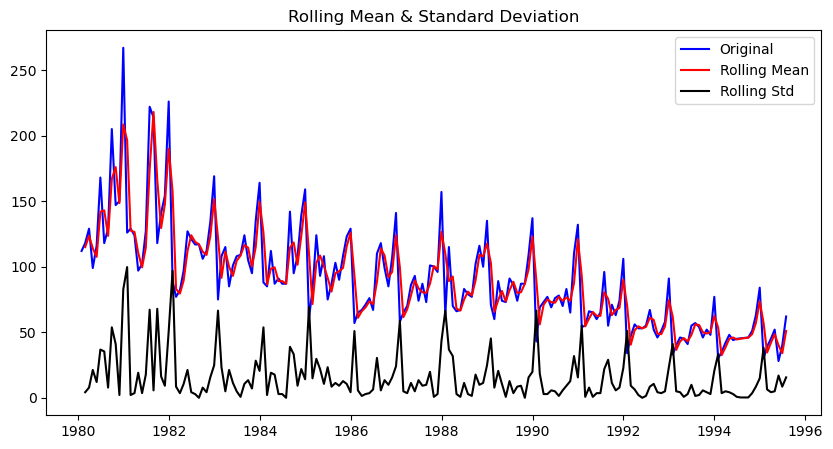

Results of Dickey-Fuller Test:
Test Statistic                  -1.876719
p-value                          0.343091
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



In [2369]:
test_stationarity(df2['Rose'])

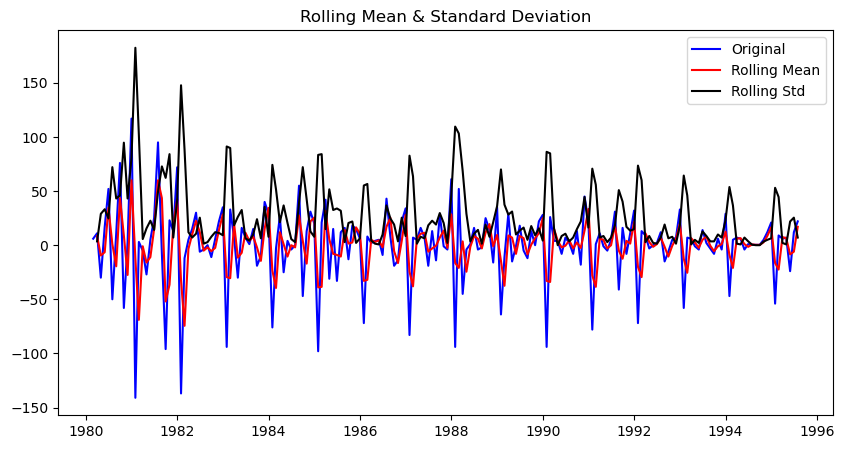

Results of Dickey-Fuller Test:
Test Statistic                -8.044395e+00
p-value                        1.810868e-12
#Lags Used                     1.200000e+01
Number of Observations Used    1.730000e+02
Critical Value (1%)           -3.468726e+00
Critical Value (5%)           -2.878396e+00
Critical Value (10%)          -2.575756e+00
dtype: float64 



In [2370]:
#time series is non stationary. Let us take a difference of order 1 and check whether the Time Series is stationary or not.

test_stationarity(df2['Rose'].diff().dropna())



Text(0, 0.5, 'Rose')

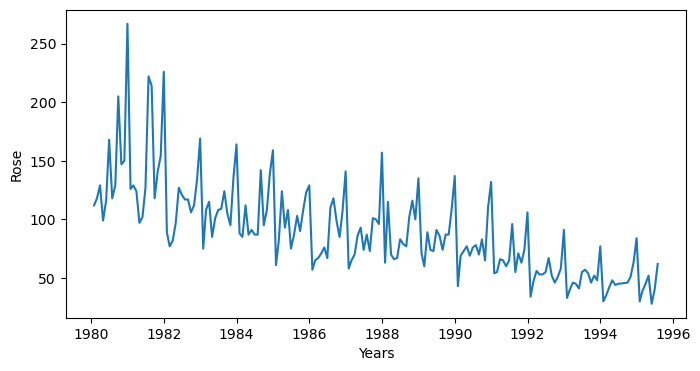

In [2371]:
#Non differenced plot
plt.figure(figsize=(8, 4))
plt.plot(df2)
plt.xlabel('Years')
plt.ylabel('Rose')

Text(0, 0.5, 'Rose')

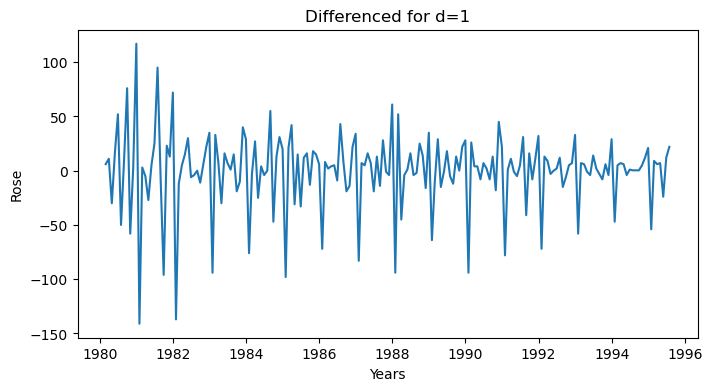

In [2372]:
#after d=1 differencing done

plt.figure(figsize=(8, 4))
plt.plot(df2.diff(periods=1))
plt.title('Differenced for d=1')
plt.xlabel('Years')
plt.ylabel('Rose')

Note: If the series is non-stationary, stationarize the Time Series by taking a difference of the Time Series. Then we can use this particular differenced series to train the ARIMA models. We do not need to worry about stationarity for the Test Data because we are not building any models on the Test Data, we are evaluating our models over there. You can look at other kinds of transformations as part of making the time series stationary like taking logarithms.
    
The p value is insignificant. We reject null hypotheisis and conclude time series to be stationary after differencing with d=1

In [2373]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 130 entries, 1980-01-31 to 1990-10-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    130 non-null    float64
dtypes: float64(1)
memory usage: 2.0 KB


## 5. Model Building - Stationary Data
- Generate ACF & PACF Plot and find the AR, MA values. - Build different ARIMA models - Auto ARIMA - Manual ARIMA - Build different SARIMA models - Auto SARIMA - Manual SARIMA - Check the performance of the models built


In [2374]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

<Figure size 500x500 with 0 Axes>

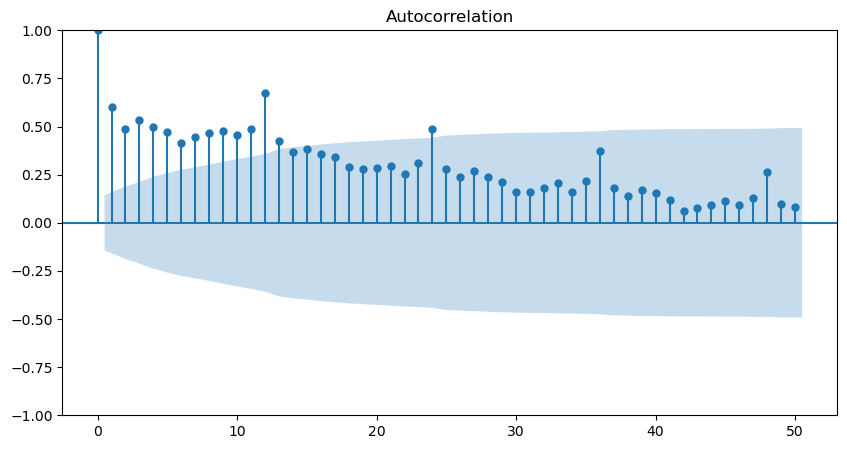

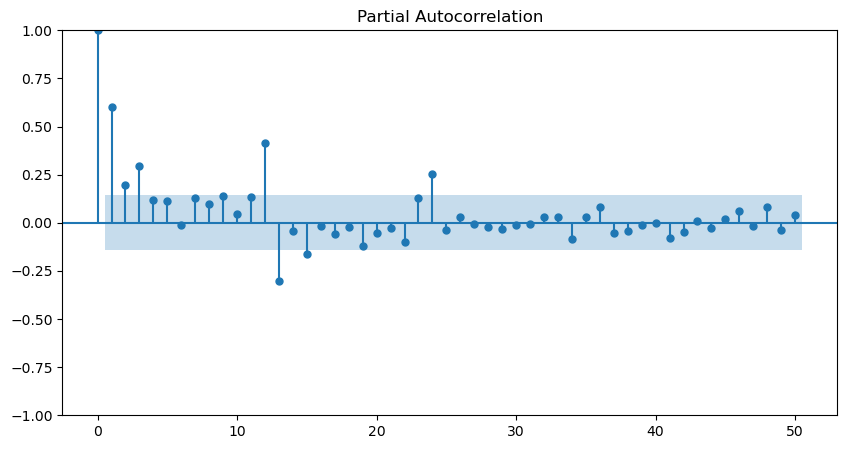

In [2375]:
plt.figure(figsize=(5,5))
plot_acf(df2['Rose'],lags=50)
plot_pacf(df2['Rose'],lags=50)

plt.show()


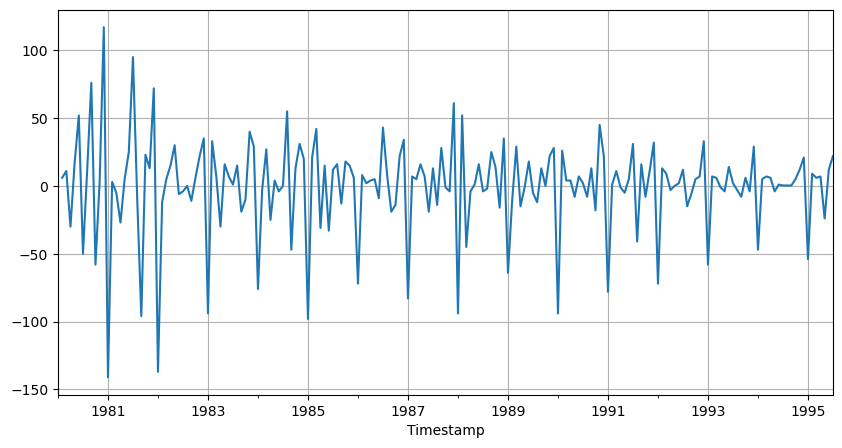

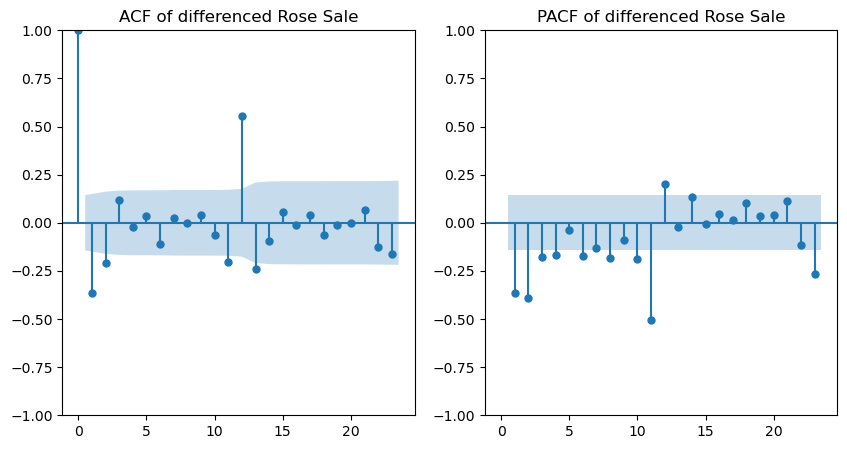

In [2376]:
# Plot the first difference series, ACF and PACF of Log(Tractor Sales) 
df2['Rose'].diff().plot() 
plt.grid() 
# ACF and PACF after taking the differenced logarithmic transformation 
f,a = plt.subplots(1,2,sharex=True,sharey=False,squeeze=False) 
#Plotting the ACF and the PACF 
plot_0 = plot_acf(df2['Rose'].diff().dropna(),title='ACF of differenced Rose Sale',ax=a[0][0])
plot_1 = plot_pacf(df2['Rose'].diff().dropna(),title='PACF of differenced Rose Sale',zero = False,ax=a[0][1]);

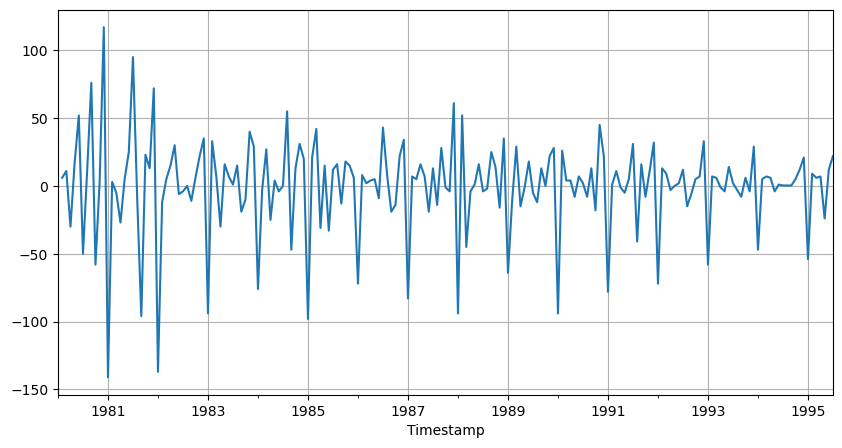

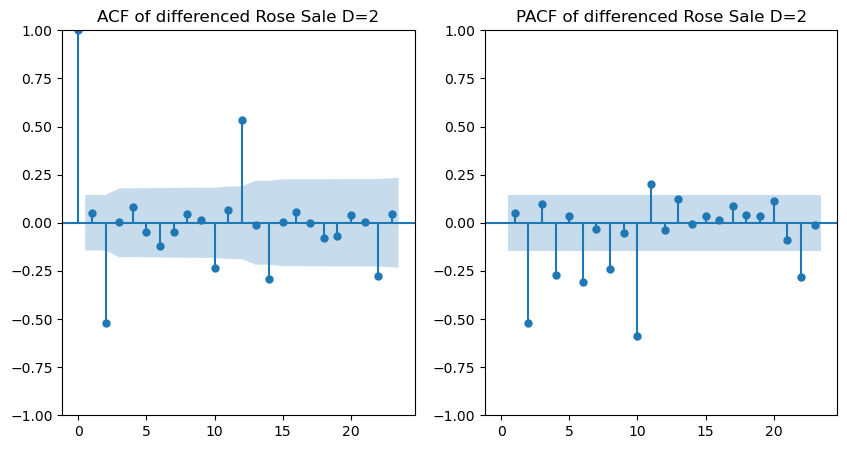

In [2377]:
# Plot the first difference series, ACF and PACF of Log(Tractor Sales) 
df2['Rose'].diff().plot() 
plt.grid() 
# ACF and PACF after taking the differenced logarithmic transformation 
f,a = plt.subplots(1,2,sharex=True,sharey=False,squeeze=False) 
#Plotting the ACF and the PACF 
plot_0 = plot_acf(df2['Rose'].diff(2).dropna(),title='ACF of differenced Rose Sale D=2',ax=a[0][0])
plot_1 = plot_pacf(df2['Rose'].diff(2).dropna(),title='PACF of differenced Rose Sale D=2',zero = False,ax=a[0][1]);

In [2378]:
pdq = 412

In [2379]:
PDQ= 222

### Build an Automated version of an ARMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC)

In [2380]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 0 as we necessary for an ARMA model 

import itertools
p = q = range(0, 3)
d= range(1)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 0, 1)
Model: (0, 0, 2)
Model: (1, 0, 0)
Model: (1, 0, 1)
Model: (1, 0, 2)
Model: (2, 0, 0)
Model: (2, 0, 1)
Model: (2, 0, 2)


In [2381]:
# Creating an empty Dataframe with column names only
ARMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [2382]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
    ARMA_model = ARIMA(train['Rose'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARMA_model.aic))
    ARMA_AIC = ARMA_AIC._append({'param':param, 'AIC': ARMA_model.aic}, ignore_index=True)

ARIMA(0, 0, 0) - AIC:1306.2886900845197
ARIMA(0, 0, 1) - AIC:1287.0930680691954
ARIMA(0, 0, 2) - AIC:1288.1168156044234
ARIMA(1, 0, 0) - AIC:1282.884243262672
ARIMA(1, 0, 1) - AIC:1273.9696715616656
ARIMA(1, 0, 2) - AIC:1272.0089605616245
ARIMA(2, 0, 0) - AIC:1283.4621278745708
ARIMA(2, 0, 1) - AIC:1272.7845600980152
ARIMA(2, 0, 2) - AIC:1272.2305289574979


In [2383]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARMA_AIC.sort_values(by='AIC',ascending=True)

param          AIC
5  (1, 0, 2)  1272.008961
8  (2, 0, 2)  1272.230529
7  (2, 0, 1)  1272.784560
4  (1, 0, 1)  1273.969672
3  (1, 0, 0)  1282.884243
6  (2, 0, 0)  1283.462128
1  (0, 0, 1)  1287.093068
2  (0, 0, 2)  1288.116816
0  (0, 0, 0)  1306.288690

In [2384]:
manual_ARIMA = ARIMA(train['Rose'], order=(4,1,2),freq='M')

results_auto_ARIMA = manual_ARIMA.fit()

print(results_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  130
Model:                 ARIMA(4, 1, 2)   Log Likelihood                -625.665
Date:                Sun, 21 Jul 2024   AIC                           1265.331
Time:                        19:49:28   BIC                           1285.349
Sample:                    01-31-1980   HQIC                          1273.465
                         - 10-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3929      0.970     -0.405      0.685      -2.294       1.508
ar.L2          0.0012      0.260      0.005      0.996      -0.508       0.511
ar.L3          0.0405      0.113      0.357      0.7

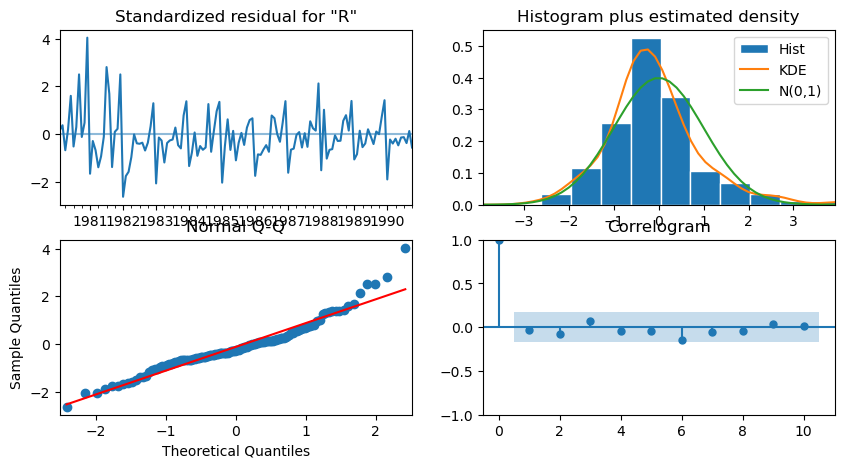

In [2490]:
results_auto_ARIMA.plot_diagnostics()
plt.show()

In [2386]:
#Predict on the Test Set using this model and evaluate the model
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [2387]:
from sklearn.metrics import  mean_squared_error
rmse_arma = mean_squared_error(test['Rose'],predicted_auto_ARIMA,squared=False)
mape_arma = mean_absolute_percentage_error(test['Rose'],predicted_auto_ARIMA)
print(rmse_arma.round(2), mape_arma.round(2))

30.61 60.62


In [2433]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_arma], 'Test MAPE': [mape_arma]}
                           ,index=['Manual ARIMA(4,1,2)'])


resultsDf = pd.concat([resultsDf])
resultsDf


Test RMSE  Test MAPE
Manual ARIMA(4,1,2)  30.607577  60.624067

Note: the best model for Manual ARIMA is (4,1,2)


## Build an Automated version of an ARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC)

In [2434]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [2435]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [2436]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['Rose'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC._append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:1313.1758613526429
ARIMA(0, 1, 1) - AIC:1261.3274438405808
ARIMA(0, 1, 2) - AIC:1259.2477803151237
ARIMA(1, 1, 0) - AIC:1297.0772943848615
ARIMA(1, 1, 1) - AIC:1260.0367627036055
ARIMA(1, 1, 2) - AIC:1259.4732049501201
ARIMA(2, 1, 0) - AIC:1278.1352807484318
ARIMA(2, 1, 1) - AIC:1261.0140762916922
ARIMA(2, 1, 2) - AIC:1261.4720006569005


In [2437]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)

param          AIC
2  (0, 1, 2)  1259.247780
5  (1, 1, 2)  1259.473205
4  (1, 1, 1)  1260.036763
7  (2, 1, 1)  1261.014076
1  (0, 1, 1)  1261.327444
8  (2, 1, 2)  1261.472001
6  (2, 1, 0)  1278.135281
3  (1, 1, 0)  1297.077294
0  (0, 1, 0)  1313.175861

In [2438]:
auto_ARIMA = ARIMA(train['Rose'], order=(0,1,2),freq='M')

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  130
Model:                 ARIMA(0, 1, 2)   Log Likelihood                -626.624
Date:                Sun, 21 Jul 2024   AIC                           1259.248
Time:                        20:00:24   BIC                           1267.827
Sample:                    01-31-1980   HQIC                          1262.734
                         - 10-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7059      0.072     -9.851      0.000      -0.846      -0.565
ma.L2         -0.1915      0.074     -2.574      0.010      -0.337      -0.046
sigma2       958.5998     86.875     11.034      0.0

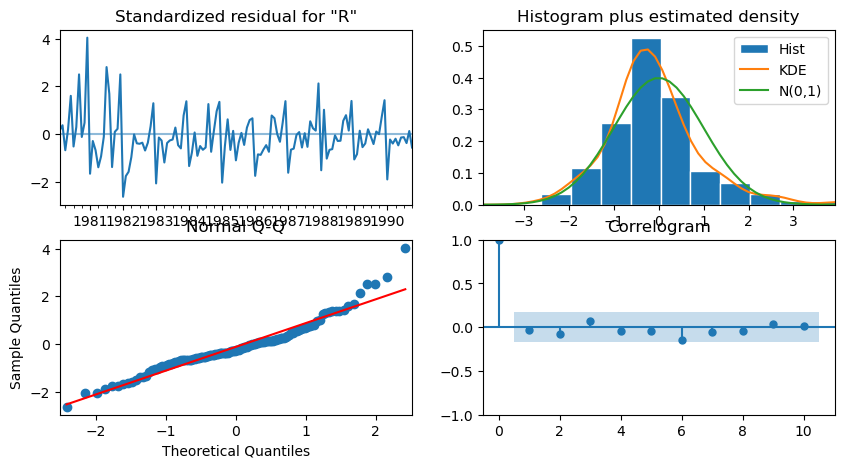

In [2439]:
results_auto_ARIMA.plot_diagnostics()
plt.show()

In [2440]:
#Predict on the Test Set using this model and evaluate the model.¶

In [2441]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [2442]:
from sklearn.metrics import  mean_squared_error
rmse_arima = mean_squared_error(test['Rose'],predicted_auto_ARIMA,squared=False)
mape_arima = mean_absolute_percentage_error(test['Rose'],predicted_auto_ARIMA)
print(rmse_arima,mape_arima)

30.903593319518173 61.23424838034126


In [2443]:
temp_resultsDf0 = pd.DataFrame({'Test RMSE': [rmse_arima], 'Test MAPE':[mape_arima]}
                           ,index=['ARIMA(0,1,2)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf0])
resultsDf

Test RMSE  Test MAPE
Manual ARIMA(4,1,2)  30.607577  60.624067
ARIMA(0,1,2)         30.903593  61.234248

## Build an Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC)

Let us look at the ACF plot once more to understand the seasonal parameter for the SARIMA model.

In [2444]:
# the p value is insignificant. We reject null hypotheisis and conclude time series to be stationary after differencing with d=1
#Plot the Autocorrelation function plots on the whole data
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

<Figure size 500x500 with 0 Axes>

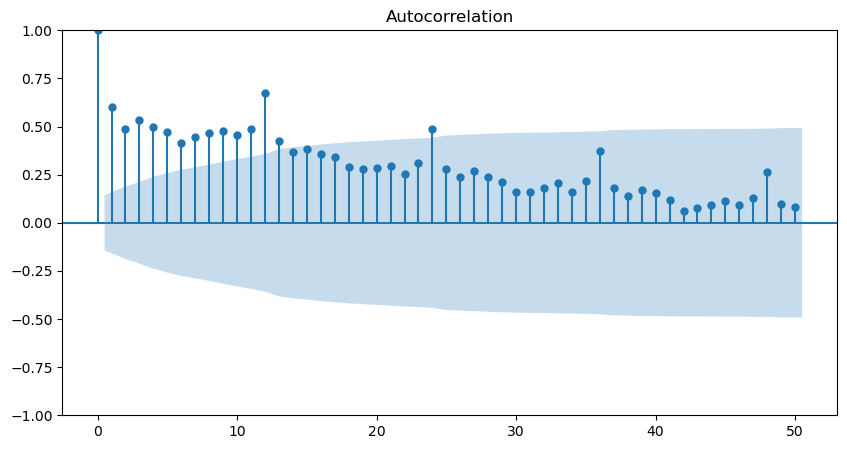

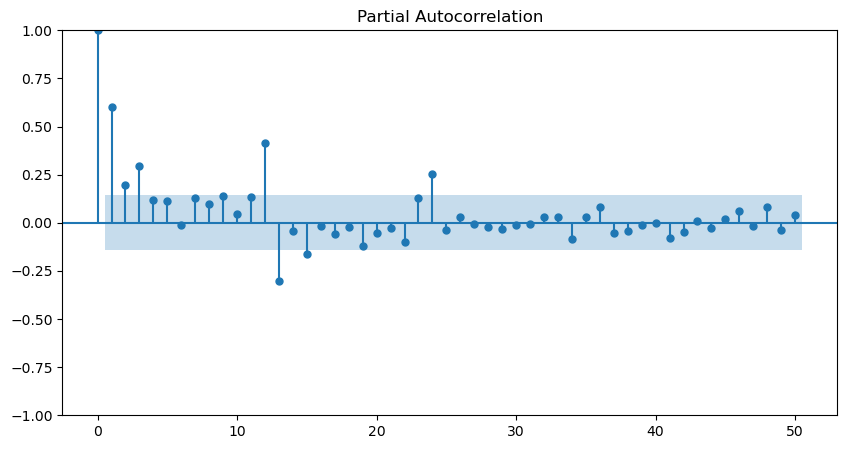

In [2445]:
plt.figure(figsize=(5,5))
plot_acf(df2['Rose'],lags=50)
plot_pacf(df2['Rose'],lags=50)

plt.show()


<Figure size 500x500 with 0 Axes>

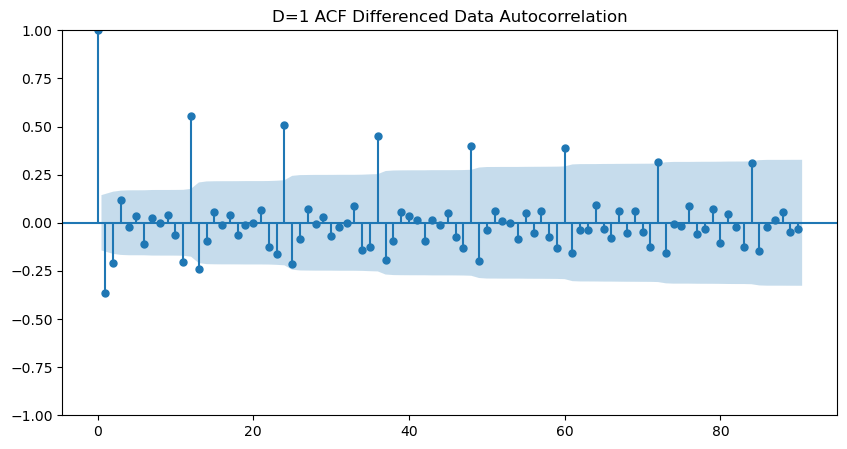

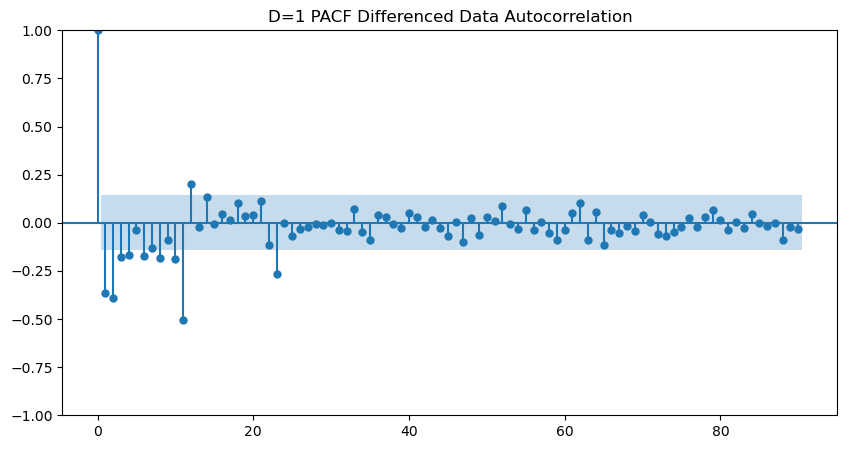

In [2446]:
plt.figure(figsize=(5,5))
plot_acf(df2['Rose'].diff().dropna(),lags=90,title='D=1 ACF Differenced Data Autocorrelation')
plot_pacf(df2['Rose'].diff().dropna(),lags=90,title='D=1 PACF Differenced Data Autocorrelation')

plt.show()

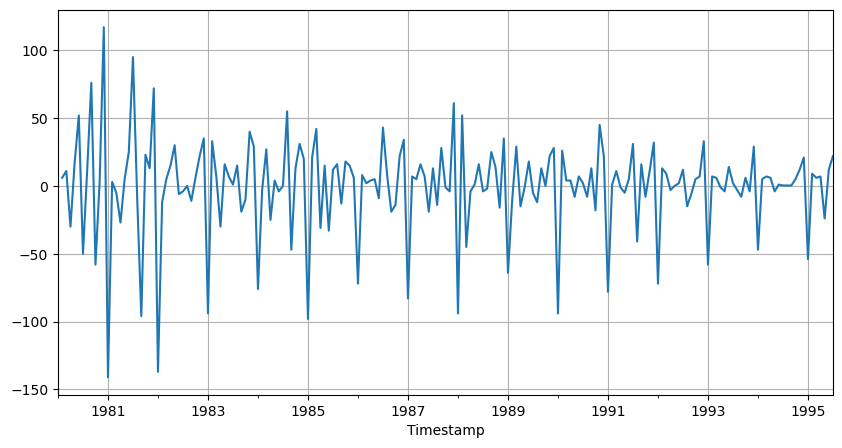

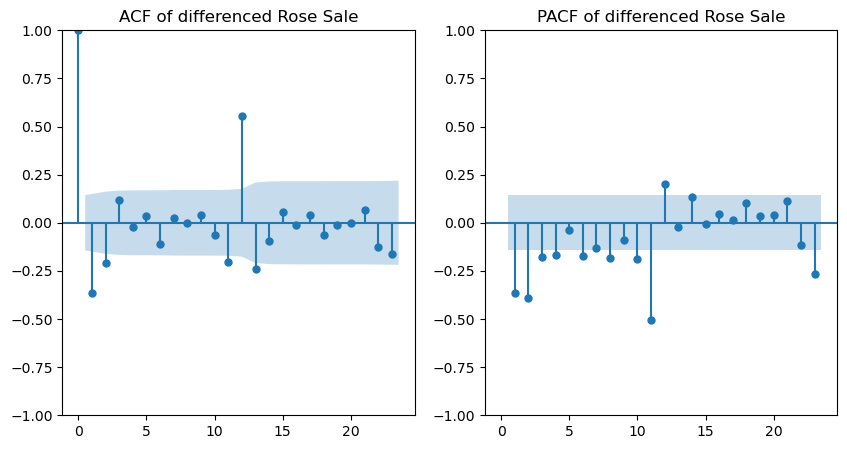

In [2447]:


# Plot the first difference series, ACF and PACF of Log(Tractor Sales) 
df2['Rose'].diff().plot() 
plt.grid() 
# ACF and PACF after taking the differenced logarithmic transformation 
f,a = plt.subplots(1,2,sharex=True,sharey=False,squeeze=False) 
#Plotting the ACF and the PACF 
plot_0 = plot_acf(df2['Rose'].diff().dropna(),title='ACF of differenced Rose Sale',ax=a[0][0])
plot_1 = plot_pacf(df2['Rose'].diff().dropna(),title='PACF of differenced Rose Sale',zero = False,ax=a[0][1]);

## Manual SARIMA 

from acf and Pacf plot we can see that d = 1, p=4, q=2

thus (4,1,2)

P= 6
D=2
Q=2

we will do differencing again for seasonality PDQ

(6,2,2)


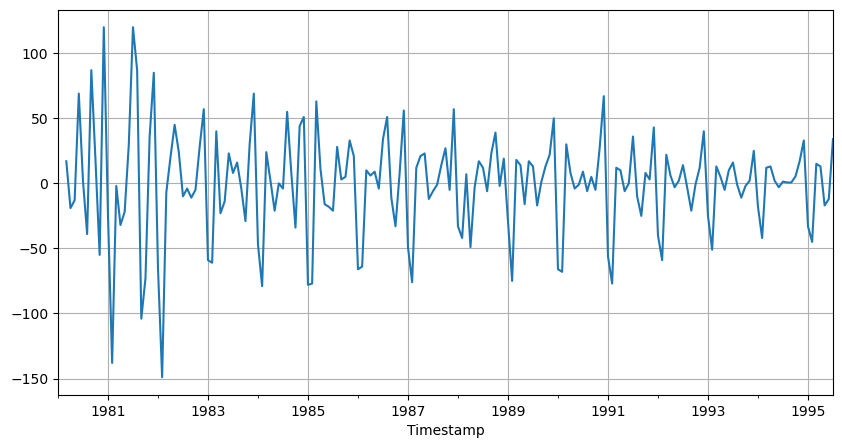

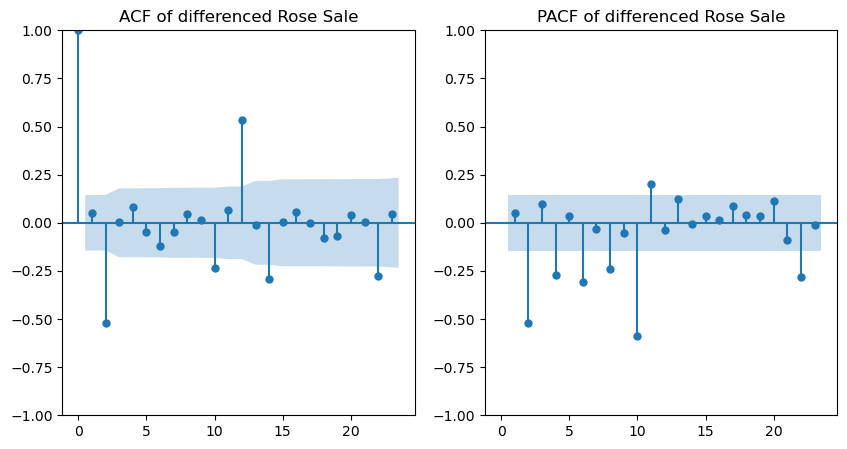

In [2448]:
# Plot the first difference series, ACF and PACF of Log(Tractor Sales) 
df2['Rose'].diff(2).plot() 
plt.grid() 
# ACF and PACF after taking the differenced logarithmic transformation 
f,a = plt.subplots(1,2,sharex=True,sharey=False,squeeze=False) 
#Plotting the ACF and the PACF 
plot_0 = plot_acf(df2['Rose'].diff(2).dropna(),title='ACF of differenced Rose Sale',ax=a[0][0])
plot_1 = plot_pacf(df2['Rose'].diff(2).dropna(),title='PACF of differenced Rose Sale',zero = False,ax=a[0][1]);

D=2 P=1 Q =0

Thus (1,2,0)

In [2449]:
import statsmodels.api as sm

manual_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(4, 1, 2),
                                seasonal_order=(1, 2, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_6 = manual_SARIMA_6.fit(maxiter=1000)
print(results_manual_SARIMA_6.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  130
Model:             SARIMAX(4, 1, 2)x(1, 2, [], 12)   Log Likelihood                -410.630
Date:                             Sun, 21 Jul 2024   AIC                            837.260
Time:                                     20:00:30   BIC                            857.169
Sample:                                          0   HQIC                           845.285
                                             - 130                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8163      0.159     -5.142      0.000      -1.127      -0.505
ar.L2          0.1138      

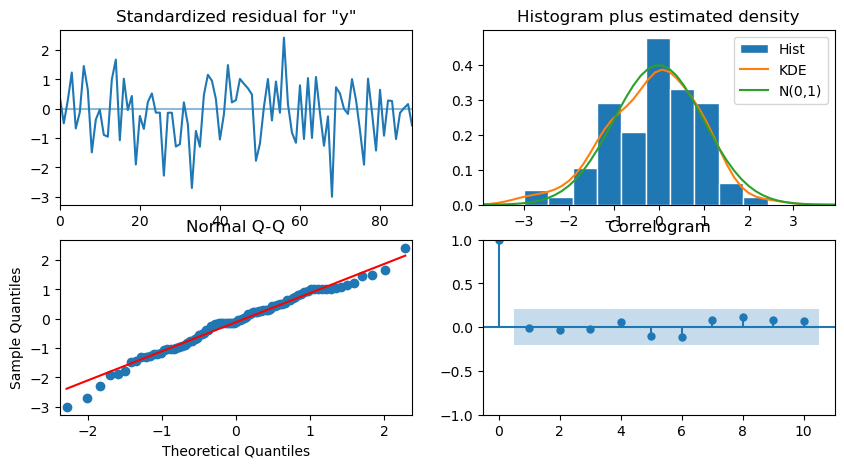

In [2450]:
results_manual_SARIMA_6.plot_diagnostics()
plt.show()

### Predict Manual Sarima on Test Set

In [2451]:
predicted_manual_SARIMA_6 = results_manual_SARIMA_6.get_forecast(steps=len(test))

In [2452]:
predicted_manual_SARIMA_6.summary_frame(alpha=0.05).head()

y        mean    mean_se  mean_ci_lower  mean_ci_upper
0  110.534032  24.147751      63.205310     157.862754
1  125.523422  24.773524      76.968206     174.078637
2   28.103173  24.788379     -20.481156      76.687503
3   47.784960  24.808998      -0.839783      96.409703
4   68.770070  24.854552      20.056044     117.484097

In [2453]:
rmse = mean_squared_error(test['Rose'],predicted_manual_SARIMA_6.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(test['Rose'],predicted_manual_SARIMA_6.predicted_mean)
print(rmse, mape)

33.07661805304838 50.00250624763566


In [2454]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse], 'Test MAPE': [mape]}
                           ,index=['Manual SARIMA(4,1,2)(2,2,2,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

resultsDf.sort_values('Test RMSE')

Test RMSE  Test MAPE
Manual ARIMA(4,1,2)             30.607577  60.624067
ARIMA(0,1,2)                    30.903593  61.234248
Manual SARIMA(4,1,2)(2,2,2,12)  33.076618  50.002506

We see that there can be a seasonality of 2 as well as 12. But from the decompostion at the start we ascertained that visually it looks like the seasonality =12 and thus using the same

In [2455]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,2)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(0, 1, 0, 12)
Model: (1, 1, 1)(0, 1, 1, 12)
Model: (1, 1, 2)(0, 1, 2, 12)
Model: (2, 1, 0)(1, 0, 0, 12)
Model: (2, 1, 1)(1, 0, 1, 12)
Model: (2, 1, 2)(1, 0, 2, 12)


In [2456]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [2457]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC._append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1303.984314159292
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1127.0323185121727
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:956.4131665692053
SARIMA(0, 1, 0)x(0, 1, 0, 12) - AIC:1152.8944112896647
SARIMA(0, 1, 0)x(0, 1, 1, 12) - AIC:946.5255706383501
SARIMA(0, 1, 0)x(0, 1, 2, 12) - AIC:827.4161882799339
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1121.3977282304234
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1097.166579524692
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:950.6998497229065
SARIMA(0, 1, 0)x(1, 1, 0, 12) - AIC:963.3074810361368
SARIMA(0, 1, 0)x(1, 1, 1, 12) - AIC:955.902415358164
SARIMA(0, 1, 0)x(1, 1, 2, 12) - AIC:829.2186210967427
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:941.2946512703303
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:943.2558966541919
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:936.3148887532496
SARIMA(0, 1, 0)x(2, 1, 0, 12) - AIC:839.1329917213076
SARIMA(0, 1, 0)x(2, 1, 1, 12) - AIC:834.4921533619387
SARIMA(0, 1, 0)x(2, 1, 2, 12) - AIC:824.3830509688775
SARIMA(0, 1, 1)x(0, 0, 0, 

In [2458]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param       seasonal         AIC
53   (0, 1, 2)  (2, 1, 2, 12)  759.854456
107  (1, 1, 2)  (2, 1, 2, 12)  761.834085
161  (2, 1, 2)  (2, 1, 2, 12)  763.820849
35   (0, 1, 1)  (2, 1, 2, 12)  767.375259
41   (0, 1, 2)  (0, 1, 2, 12)  768.421506

In [2459]:
import statsmodels.api as sm

auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(0, 1, 2),
                                seasonal_order=(2, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
print(results_auto_SARIMA_6.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  130
Model:             SARIMAX(0, 1, 2)x(2, 1, 2, 12)   Log Likelihood                -372.927
Date:                            Sun, 21 Jul 2024   AIC                            759.854
Time:                                    20:02:14   BIC                            777.353
Sample:                                         0   HQIC                           766.911
                                            - 130                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9328      0.191     -4.879      0.000      -1.308      -0.558
ma.L2         -0.0923      0.126   

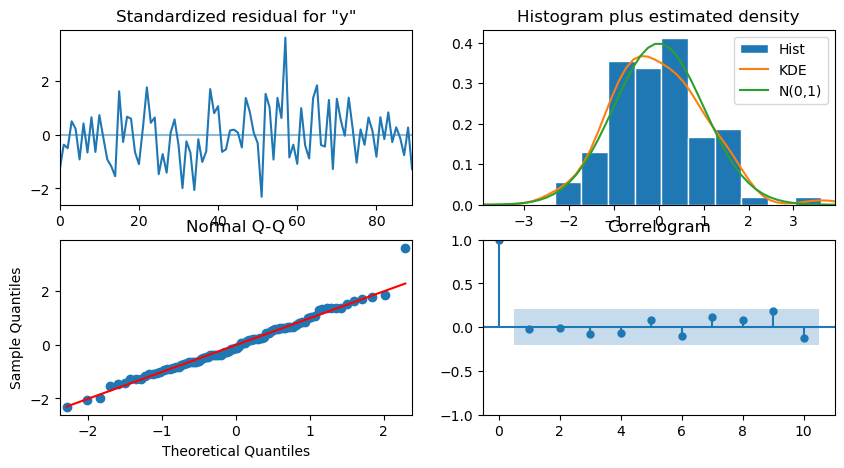

In [2460]:
results_auto_SARIMA_6.plot_diagnostics()
plt.show()

From the model diagnostics plot, we can see that all the individual diagnostics plots almost follow the theoretical numbers and thus we cannot develop any pattern from these plots.

### Predict on the Test Set using this model and evaluate the model

In [2461]:
predicted_auto_SARIMA_6 = results_auto_SARIMA_6.get_forecast(steps=len(test))


In [2462]:
predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head()

y        mean    mean_se  mean_ci_lower  mean_ci_upper
0   96.954962  14.385658      68.759591     125.150333
1  131.683798  14.488397     103.287062     160.080534
2   43.974307  14.489701      15.575015      72.373599
3   62.229131  14.493929      33.821551      90.636711
4   66.783509  14.495739      38.372382      95.194636

In [2463]:
rmse = mean_squared_error(test['Rose'],predicted_auto_SARIMA_6.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(test['Rose'],predicted_auto_SARIMA_6.predicted_mean)
print(rmse, mape)

15.408401107615964 23.207338515477954


In [2464]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse], 'Test MAPE': [mape]}
                           ,index=['SARIMA(0,1,2)(2,1,2,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

resultsDf.sort_values('Test RMSE')

Test RMSE  Test MAPE
SARIMA(0,1,2)(2,1,2,12)         15.408401  23.207339
Manual ARIMA(4,1,2)             30.607577  60.624067
ARIMA(0,1,2)                    30.903593  61.234248
Manual SARIMA(4,1,2)(2,2,2,12)  33.076618  50.002506

We see that we have huge gain the RMSE value by including the seasonal parameters as well.

Please do refer to $\href{https://online.stat.psu.edu/stat510/lesson/4/4.1}{this\ link}$ to read more about Seasonal Auto-Regressive Integrtaed Moving Average Models.


#### This is where our model building exercise ends. 

Please do try out with 12 as a seasonal parameter and check whether that gives you a better RMSE value. Also, try taking different kinds of transformations as well.

Now, we will take our best model and forecast 12 months into the future with appropriate confidence intervals to see how the predictions look. We have to build our model on the full data for this.

### Building the most optimum model on the Full Data

## 6. Compare the performance of the models
- Compare the performance of all the models built - Choose the best model with proper rationale - Rebuild the best model using the entire data - Make a forecast for the next 12 months


In [2470]:
full_data_model = sm.tsa.statespace.SARIMAX(df2['Rose'],
                                order=(0,1,2),
                                seasonal_order=(2, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  187
Model:             SARIMAX(0, 1, 2)x(2, 1, 2, 12)   Log Likelihood                -588.600
Date:                            Sun, 21 Jul 2024   AIC                           1191.200
Time:                                    20:06:23   BIC                           1212.133
Sample:                                01-31-1980   HQIC                          1199.706
                                     - 07-31-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8259      0.080    -10.339      0.000      -0.982      -0.669
ma.L2         -0.0801      0.086   

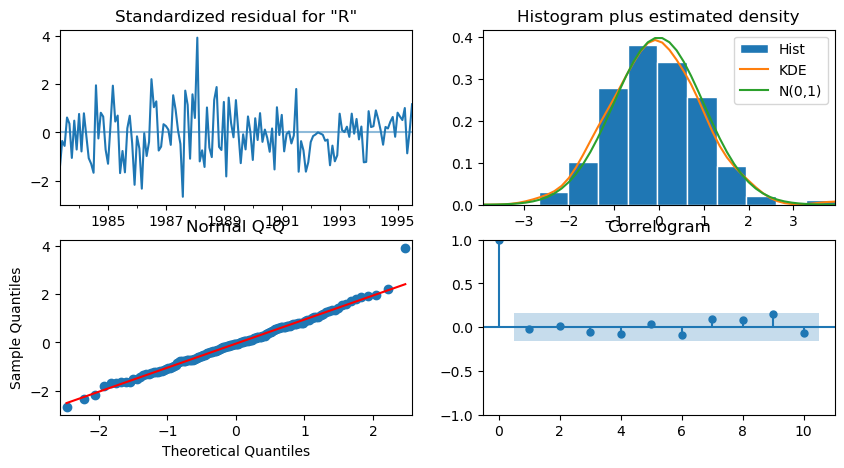

In [2471]:
results_full_data_model.plot_diagnostics();

## Evaluate the model on the whole and predict 12 months into the future

In [2472]:
predicted_manual_SARIMA_6_full_data = results_full_data_model.get_forecast(steps=12)

In [2473]:
predicted_manual_SARIMA_6_full_data.summary_frame(alpha=0.05).tail()

Rose             mean    mean_se  mean_ci_lower  mean_ci_upper
1996-03-31  37.023596  13.414262      10.732125      63.315067
1996-04-30  38.549341  13.468862      12.150856      64.947826
1996-05-31  29.098720  13.523299       2.593541      55.603898
1996-06-30  36.360853  13.577524       9.749394      62.972312
1996-07-31  49.521515  13.631547      22.804174      76.238857

In [2484]:
rmse = mean_squared_error(df2['Rose'],results_full_data_model.fittedvalues,squared=False)
mape = mean_absolute_percentage_error(test['Rose'],predicted_auto_ARIMA)
print('RMSE of the Full Model:',rmse,'\n','MAPE of full model is:',mape)

RMSE of the Full Model: 33.47795360243108 
 MAPE of full model is: 61.23424838034126


In [2481]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_6_full_data.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-08-31',end='1996-07-31', freq='M'))

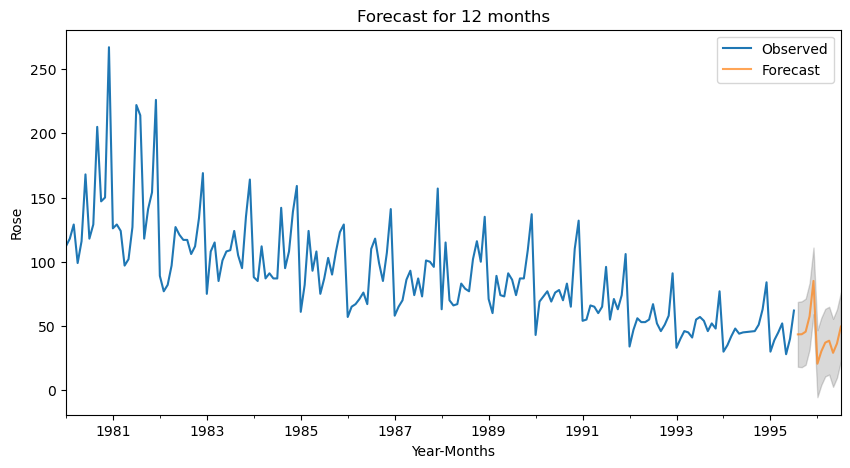

In [2486]:
# plot the forecast along with the confidence band

axis = df2['Rose'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Rose')
plt.title('Forecast for 12 months')
plt.legend(loc='best')
plt.show()

In [2497]:
resultsDf

Test RMSE  Test MAPE
Manual ARIMA(4,1,2)             30.607577  60.624067
ARIMA(0,1,2)                    30.903593  61.234248
Manual SARIMA(4,1,2)(2,2,2,12)  33.076618  50.002506
SARIMA(0,1,2)(2,1,2,12)         15.408401  23.207339

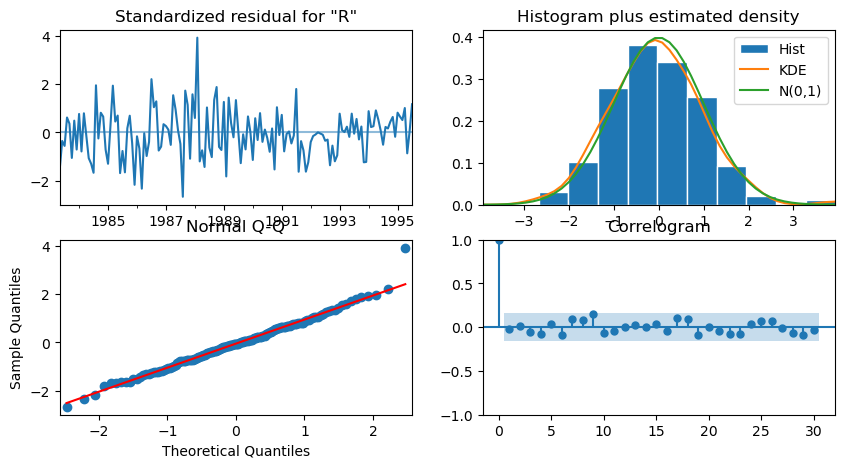

In [2489]:
results_full_data_model.plot_diagnostics(lags=30, figsize=(10,5))

plt.show()

#### Note : <u>4 plots in the residuals diagnostic plots tell us</u> : 

- **Standardized residuals plot**: <i>The top left plot shows 1-step-ahead standardized residuals. 
    If model is working correctly, then no pattern should be obvious in the residuals which is clearly not visible from the plot as well .</i>



- **Histogram plus estimated density plot**: <i>This plot shows the distribution of the residuals.The orange line shows a smoothed version of this histogram, and the green line shows a normal distribution. If the model is good these two lines should be the same. Here there are small differences between them, which indicate that our model is doing just well enough.</i>



- **Normal Q-Q plot**: <i>The Q-Q plot compare the distribution of residuals to normal distribution. If the distribution of the residuals is normal, then all the points should lie along the red line, except for some values at the end, which is exactly happening in this case.</i>



- **Correlogram plot**: <i>The correlogram plot is the ACF plot of the residuals rather than the data. 95% of the correlations for lag >0  should not be significant (within the blue shades). If there is a significant correlation in the residuals, it means that there is information in the data that was not captured by the model, which is clearly not in this case</i> .

In [2496]:
predicted_manual_SARIMA_6_full_data.summary_frame()


Rose             mean    mean_se  mean_ci_lower  mean_ci_upper
1995-08-31  43.470209  12.887618      18.210942      68.729476
1995-09-30  43.571145  13.081665      17.931553      69.210737
1995-10-31  45.551518  13.137730      19.802040      71.300995
1995-11-30  57.605100  13.193566      31.746185      83.464015
1995-12-31  85.082180  13.249188      59.114249     111.050111
1996-01-31  20.609915  13.304356      -5.466143      46.685973
1996-02-29  30.270483  13.359465       4.086412      56.454553
1996-03-31  37.023596  13.414262      10.732125      63.315067
1996-04-30  38.549341  13.468862      12.150856      64.947826
1996-05-31  29.098720  13.523299       2.593541      55.603898
1996-06-30  36.360853  13.577524       9.749394      62.972312
1996-07-31  49.521515  13.631547      22.804174      76.238857

In [ ]:
predicted_manual_SARIMA_6_full_data = results_full_data_model.get_forecast(steps=12)